In [ ]:
import os
# Modul untuk berinteraksi dengan sistem operasi, seperti membaca direktori dan mengelola file.
import glob
# Modul untuk mencari pola nama file atau path di direktori dengan wildcard (*).
import numpy as np
# NumPy adalah paket dasar untuk komputasi ilmiah dengan Python, khususnya array berukuran besar dan multidimensi.
import pandas as pd
# Pandas adalah paket untuk analisis data yang menyediakan struktur data dan alat analisis data yang cepat.
import matplotlib.pyplot as plt
# Matplotlib adalah paket untuk visualisasi data dalam bentuk grafik dan plot.
import cv2
# OpenCV adalah pustaka untuk pengolahan gambar dan video.
import seaborn as sns
# Seaborn adalah paket untuk visualisasi data statistik berbasis Matplotlib.
from tqdm import tqdm
# TQDM adalah modul untuk menampilkan progress bar saat iterasi atau pengulangan berlangsung.
from PIL import Image
# PIL (Python Imaging Library) adalah pustaka untuk manipulasi gambar.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Modul untuk evaluasi kinerja model.
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_val_predict
# Modul untuk pemodelan dan penyetelan model.
from IPython.display import display
# Modul untuk menampilkan output di Jupyter Notebook.

import shutil
# Modul untuk operasi file dan direktori seperti mengcopy atau menghapus.
import zipfile
# Modul untuk menangani file ZIP.
import nibabel as nib
# NiBabel adalah pustaka untuk bekerja dengan format data neuroimaging (NIfTI dan lainnya).
from skimage import color, util, filters, measure, feature
# Pustaka Scikit-image untuk operasi citra.
from skimage.feature import greycomatrix, greycoprops
# Modul di Scikit-image untuk ekstraksi fitur GLCM.
from skimage.measure import regionprops, shannon_entropy
# Modul di Scikit-image untuk menghitung properti daerah dalam citra.
from sklearn.svm import SVC
# Modul dari Scikit-learn untuk Support Vector Classifier (SVC).
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
# Modul dari Scikit-learn untuk preprocessing data.
import urllib.request
# Modul untuk mengambil data dari URL menggunakan protokol HTTP.


# **DATASET**

Dimensi dari anat: (160, 239, 200)
Dimensi dari rest: (64, 64, 36, 82)


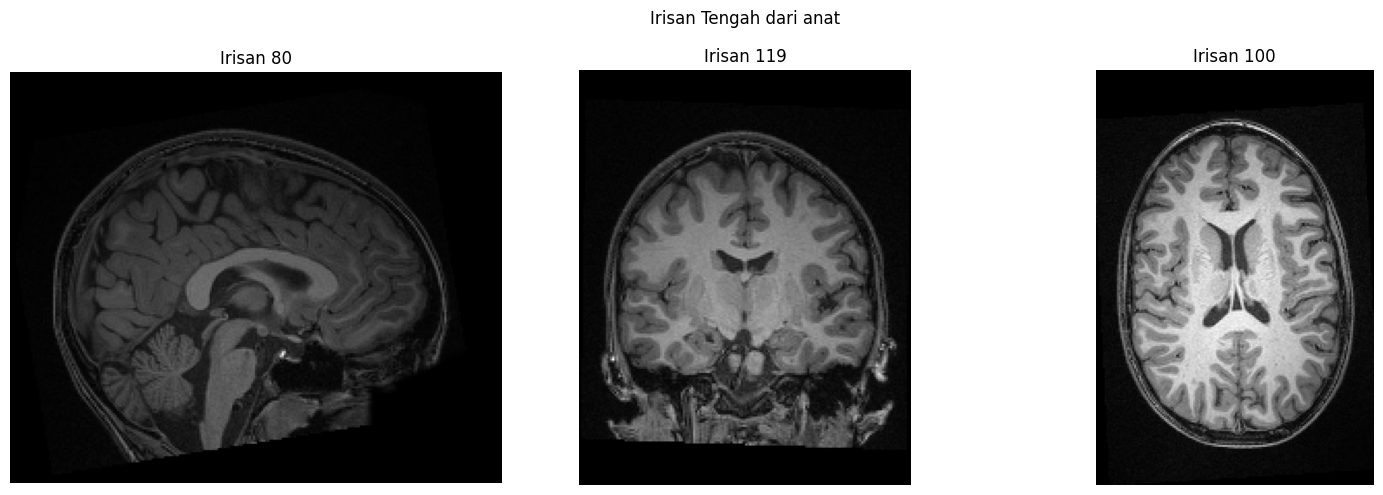

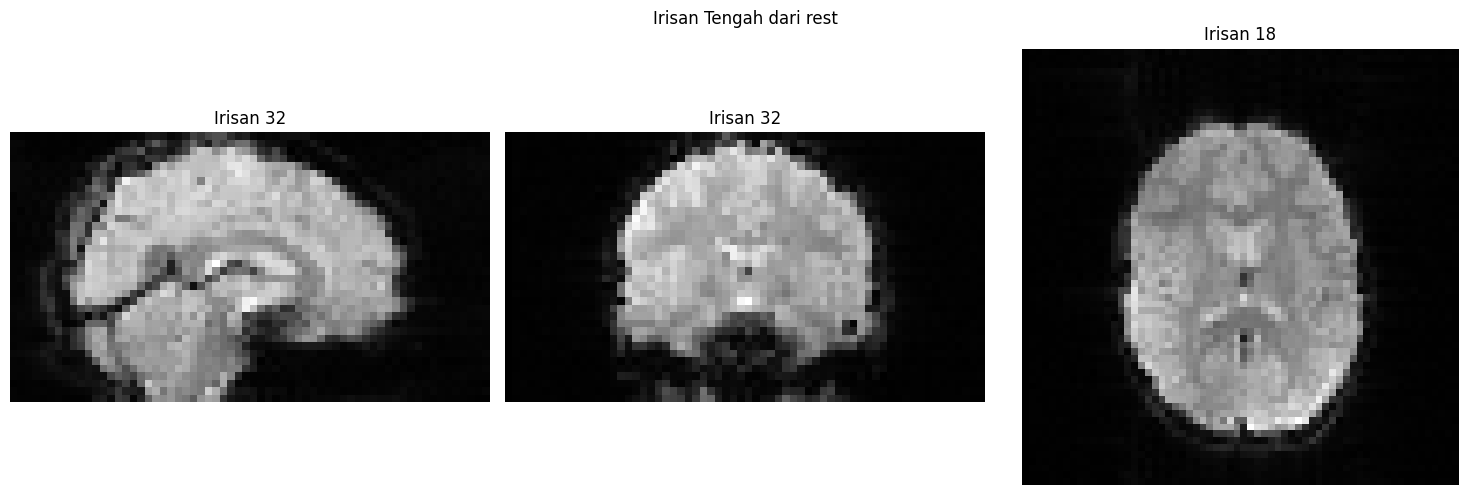

Indeks irisan tengah untuk anat: [80, 119, 100]
Indeks irisan tengah untuk rest: [32, 32, 18]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 9., 11., 17., ..., 21., 10., 17.],
        [12., 10., 14., ..., 12., 19.,  9.],
        ...,
        [17., 11., 10., ..., 13., 16., 11.],
        [16., 11., 18., ...,  8., 22., 14.],
        [13., 13., 13., ..., 12., 18., 10.]]))

In [ ]:
# Path file
mprage_file = '/content/drive/MyDrive/penpol/ohsu/OHSU_50142/OHSU_50142/anat/NIfTI/mprage.nii.gz'
rest_file = '/content/drive/MyDrive/penpol/ohsu/OHSU_50142/OHSU_50142/rest_1/NIfTI/rest.nii.gz'

# Muat file NIfTI
mprage_img = nib.load(mprage_file)
rest_img = nib.load(rest_file)

# Ambil data dan dimensinya
mprage_data = mprage_img.get_fdata()
rest_data = rest_img.get_fdata()

# Cetak dimensi dari file NIfTI
mprage_dims = mprage_data.shape
rest_dims = rest_data.shape

print(f'Dimensi dari anat: {mprage_dims}')
print(f'Dimensi dari rest: {rest_dims}')

# Tangani data 4D (ekstrak titik waktu pertama jika ada 4 dimensi)
if rest_data.ndim == 4:
    rest_data = rest_data[..., 0]  # Ekstrak titik waktu pertama

# Fungsi untuk mendapatkan irisan tengah dari setiap dimensi
def get_middle_slices(data):
    slices = []
    middle_indices = []
    for dim in range(data.ndim):
        index = data.shape[dim] // 2
        middle_indices.append(index)
        slices.append(np.take(data, index, axis=dim))
    return slices, middle_indices

# Dapatkan irisan tengah dan indeksnya
mprage_slices, mprage_middle_indices = get_middle_slices(mprage_data)
rest_slices, rest_middle_indices = get_middle_slices(rest_data)

# Fungsi untuk menyimpan irisan tengah sebagai gambar
def save_middle_slice(slice_data, file_name):
    plt.imshow(slice_data.T, cmap='gray', origin='lower')
    plt.axis('off')
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
    plt.close()

# Simpan irisan tengah dari mprage dan rest data (pilih irisan tengah sepanjang sumbu z)
middle_slice_mprage = mprage_slices[2]  # Pilih irisan tengah sepanjang sumbu z untuk mprage
middle_slice_rest = rest_slices[2]      # Pilih irisan tengah sepanjang sumbu z untuk rest

save_middle_slice(middle_slice_mprage, 'middle_slice_mprage.png')
save_middle_slice(middle_slice_rest, 'middle_slice_rest.png')

# Simpan irisan tengah dalam variabel
middle_slice_mprage_variable = middle_slice_mprage
middle_slice_rest_variable = middle_slice_rest

# Fungsi untuk menampilkan irisan tengah
def plot_slices(slices, title, indices):
    fig, axes = plt.subplots(1, len(slices), figsize=(15, 5))
    fig.suptitle(title)
    for ax, slice_, idx in zip(axes, slices, indices):
        ax.imshow(slice_.T, cmap='gray', origin='lower')
        ax.set_title(f'Irisan {idx}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Tampilkan irisan tengah
plot_slices(mprage_slices, 'Irisan Tengah dari anat', mprage_middle_indices)
plot_slices(rest_slices, 'Irisan Tengah dari rest', rest_middle_indices)

# Cetak indeks irisan tengah
print(f'Indeks irisan tengah untuk anat: {mprage_middle_indices}')
print(f'Indeks irisan tengah untuk rest: {rest_middle_indices}')

# Kembalikan variabel irisan tengah
middle_slice_mprage_variable, middle_slice_rest_variable


**MIDDLE SLICE ANAT**

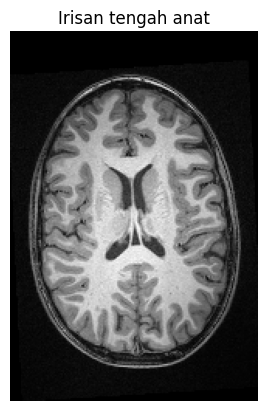

In [ ]:
# Plot irisan tengah ant
plt.imshow(middle_slice_mprage_variable.T, cmap='gray', origin='lower')
plt.title('Irisan tengah anat')
plt.axis('off')
plt.show()


**MIDDLE SLICE REST**

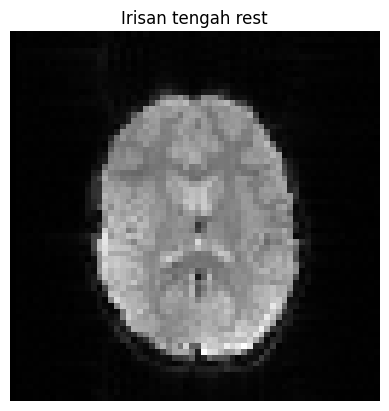

In [ ]:
# Plot irisan tengah rest
plt.imshow(middle_slice_rest_variable.T, cmap='gray', origin='lower')
plt.title('Irisan tengah rest')
plt.axis('off')
plt.show()


#**MENGAMBIL 3 MIDDLE SLICE**

In [ ]:
# Path root dari folder ohsu
root_folder = '/content/drive/MyDrive/penpol/ohsu'
output_folder = '/content/drive/MyDrive/penpol/dataOhsu'  # Direktori untuk menyimpan file JPG

# Fungsi untuk memproses semua file NIfTI di folder anat atau rest
def proses_folder(folder_path, output_path):
    # List semua subfolder yang mengandung folder anat dan rest
    subfolders = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

    # Hitung jumlah gambar yang berhasil disimpan
    total_images_saved = 0

    # List untuk menyimpan nama subfolder yang telah diproses
    processed_subfolders = []

    # Loop untuk setiap subfolder
    for subfolder in subfolders:
        # Path ke file mprage.nii.gz dan rest.nii.gz
        mprage_file = os.path.join(folder_path, subfolder, subfolder, 'anat', 'NIfTI', 'mprage.nii.gz')

        # Path untuk file rest.nii.gz (mulai dari rest_1, rest_2, dst)
        rest_file = None
        for i in range(1, 4):  # Coba hingga rest_3
            rest_candidate = os.path.join(folder_path, subfolder, subfolder, f'rest_{i}', 'NIfTI', 'rest.nii.gz')
            if os.path.exists(rest_candidate):
                rest_file = rest_candidate
                break

        # Inisialisasi hitungan gambar untuk subfolder ini
        subfolder_image_count = 0

        # Cek jika file mprage.nii.gz ada
        if os.path.exists(mprage_file):
            # Muat file NIfTI mprage.nii.gz
            mprage_img = nib.load(mprage_file)
            mprage_data = mprage_img.get_fdata()

            # Hitung posisi irisan di sekitar tengah sumbu z
            z_mid = mprage_data.shape[2] // 2
            z_slices = [
                mprage_data[:, :, z_mid - 1],
                mprage_data[:, :, z_mid],
                mprage_data[:, :, z_mid + 1]
            ]

            # Simpan setiap irisan sebagai file JPG di dalam folder 'anat'
            anat_output_folder = os.path.join(output_path, 'anat')
            os.makedirs(anat_output_folder, exist_ok=True)
            for idx, slice_data in enumerate(z_slices):
                slice_data = slice_data.T  # Transpose data
                nama_file_anat = f'anat_{subfolder}_slice{idx+1}.jpg'
                plt.imshow(slice_data, cmap='gray', origin='lower')
                plt.axis('off')
                plt.savefig(os.path.join(anat_output_folder, nama_file_anat), bbox_inches='tight', pad_inches=0)
                plt.close()

                # Tambahkan jumlah gambar yang berhasil disimpan
                subfolder_image_count += 1

        # Cek jika file rest.nii.gz ada
        if rest_file:
            # Muat file NIfTI rest.nii.gz
            rest_img = nib.load(rest_file)
            rest_data = rest_img.get_fdata()

            # Hitung posisi irisan di sekitar tengah sumbu z
            z_mid = rest_data.shape[2] // 2
            z_slices = [
                rest_data[:, :, z_mid - 1, 0],  # titik waktu pertama
                rest_data[:, :, z_mid, 0],      # titik waktu pertama
                rest_data[:, :, z_mid + 1, 0]   # titik waktu pertama
            ]

            # Simpan setiap irisan sebagai file JPG di dalam folder 'rest'
            rest_output_folder = os.path.join(output_path, 'rest')
            os.makedirs(rest_output_folder, exist_ok=True)
            for idx, slice_data in enumerate(z_slices):
                slice_data = slice_data.T  # Transpose data
                nama_file_rest = f'rest_{subfolder}_slice{idx+1}.jpg'
                plt.imshow(slice_data, cmap='gray', origin='lower')
                plt.axis('off')
                plt.savefig(os.path.join(rest_output_folder, nama_file_rest), bbox_inches='tight', pad_inches=0)
                plt.close()

                # Tambahkan jumlah gambar yang berhasil disimpan
                subfolder_image_count += 1

        # Tambahkan jumlah gambar yang berhasil disimpan untuk subfolder ini ke total_images_saved
        total_images_saved += subfolder_image_count

        # Tambahkan subfolder ini ke daftar subfolder yang telah diproses
        processed_subfolders.append(subfolder)

    # Tampilkan jumlah subfolder yang telah diproses
    print(f"Total subfolder yang diproses: {len(subfolders)}")
    print(f"Subfolder yang telah diproses: {processed_subfolders}")

    # Tampilkan jumlah gambar yang berhasil disimpan
    print(f"Total gambar yang disimpan: {total_images_saved}")

# Panggil fungsi untuk memproses folder root dan simpan ke output_folder
proses_folder(root_folder, output_folder)

# Tampilkan hasil proses
print("Proses pengolahan selesai.")
print("File JPG telah disimpan di:", output_folder)


Total subfolder yang diproses: 28
Subfolder yang telah diproses: ['OHSU_50162', 'OHSU_50171', 'OHSU_50169', 'OHSU_50170', 'OHSU_50166', 'OHSU_50168', 'OHSU_50165', 'OHSU_50164', 'OHSU_50163', 'OHSU_50167', 'OHSU_50159', 'OHSU_50157', 'OHSU_50153', 'OHSU_50150', 'OHSU_50155', 'OHSU_50158', 'OHSU_50160', 'OHSU_50156', 'OHSU_50161', 'OHSU_50152', 'OHSU_50148', 'OHSU_50147', 'OHSU_50145', 'OHSU_50144', 'OHSU_50146', 'OHSU_50149', 'OHSU_50142', 'OHSU_50143']
Total gambar yang disimpan: 168
Proses pengolahan selesai.
File JPG telah disimpan di: /content/drive/MyDrive/penpol/dataOhsu


**MENAMPILKAN HASIL PENGAMBILAN 3 SLICE DARI ANAT DAN REST**

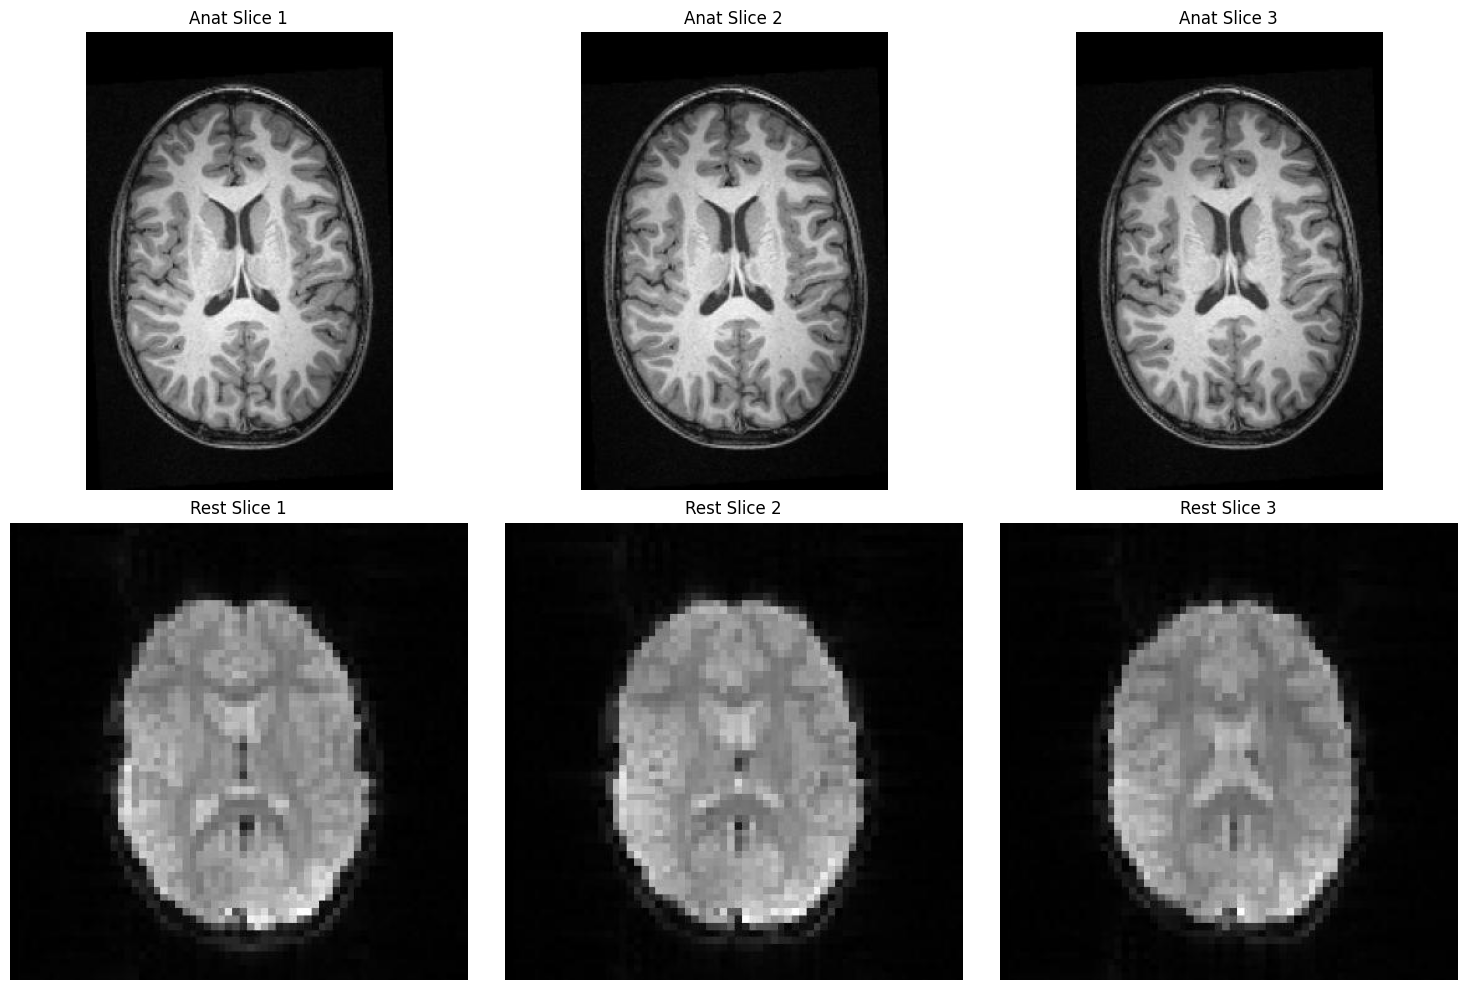

In [ ]:
# Direktori output yang berisi gambar JPG
output_folder = '/content/drive/MyDrive/penpol/dataOhsu'

# ID subfolder yang akan ditampilkan (sesuaikan dengan ID yang ada di folder)
example_id = 'OHSU_50142'  # Ganti dengan ID yang ingin Anda tampilkan

# Path ke folder anat dan rest
anat_folder = os.path.join(output_folder, 'anat')
rest_folder = os.path.join(output_folder, 'rest')

# File gambar anat dan rest untuk ID tertentu
anat_files = [os.path.join(anat_folder, f'anat_{example_id}_slice{i}.jpg') for i in range(1, 4)]
rest_files = [os.path.join(rest_folder, f'rest_{example_id}_slice{i}.jpg') for i in range(1, 4)]

# Plot gambar
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot irisannya
for idx, (anat_file, rest_file) in enumerate(zip(anat_files, rest_files)):
    if os.path.exists(anat_file):
        anat_img = imread(anat_file)
        axes[0, idx].imshow(anat_img, cmap='gray')
        axes[0, idx].axis('off')
        axes[0, idx].set_title(f'Anat Slice {idx + 1}')
    else:
        print(f"Gambar anat tidak ditemukan: {anat_file}")

    if os.path.exists(rest_file):
        rest_img = imread(rest_file)
        axes[1, idx].imshow(rest_img, cmap='gray')
        axes[1, idx].axis('off')
        axes[1, idx].set_title(f'Rest Slice {idx + 1}')
    else:
        print(f"Gambar rest tidak ditemukan: {rest_file}")

# Menampilkan plot
plt.tight_layout()
plt.show()


**MENGHITUNG JUMLAH DATA ANAT**

In [ ]:
# Path ke direktori anat
anat_dir = '/content/drive/MyDrive/penpol/dataOhsu/anat'

# Inisialisasi hitungan jumlah gambar
total_images = 0

# Loop melalui semua file dalam direktori anat
for filename in os.listdir(anat_dir):
    if filename.endswith('.jpg'):  # Pastikan file adalah file JPG
        total_images += 1

# Tampilkan jumlah gambar yang ditemukan
print(f"Total jumlah gambar dalam direktori anat: {total_images}")


Total jumlah gambar dalam direktori anat: 84


**MENGHITUNG JUMLAH DATA REST**

In [ ]:
# Path ke direktori rest
rest_dir = '/content/drive/MyDrive/penpol/dataOhsu/rest'

# Inisialisasi hitungan jumlah gambar
total_images = 0

# Loop melalui semua file dalam direktori rest
for filename in os.listdir(rest_dir):
    if filename.endswith('.jpg'):  # Pastikan file adalah file JPG
        total_images += 1

# Tampilkan jumlah gambar yang ditemukan
print(f"Total jumlah gambar dalam direktori rest: {total_images}")


Total jumlah gambar dalam direktori rest: 84


**KELOLA DIR DATA OSHU**

In [ ]:
# Fungsi untuk mendapatkan daftar file dan kategori dari direktori
def get_files_with_category(root_folder, categories):
    file_list = []
    for category in categories:
        folder_path = os.path.join(root_folder, category)
        if os.path.exists(folder_path):
            for root, _, files in os.walk(folder_path):
                for file in files:
                    if file.endswith(('.jpg')):  # Hanya gambar
                        file_path = os.path.join(root, file)
                        file_list.append({'filepath': file_path, 'category': category})
    return file_list

# Path root ke direktori yang berisi subfolder anat dan rest
root_folder = '/content/drive/MyDrive/penpol/dataOhsu'

# List kategori (nama subfolder)
categories = ['anat', 'rest']

# Dapatkan daftar file dengan kategori
files_with_category = get_files_with_category(root_folder, categories)

# Buat DataFrame dari daftar file
df = pd.DataFrame(files_with_category)

# Tampilkan DataFrame
print(df.head())


                                            filepath category
0  /content/drive/MyDrive/penpol/dataOhsu/anat/an...     anat
1  /content/drive/MyDrive/penpol/dataOhsu/anat/an...     anat
2  /content/drive/MyDrive/penpol/dataOhsu/anat/an...     anat
3  /content/drive/MyDrive/penpol/dataOhsu/anat/an...     anat
4  /content/drive/MyDrive/penpol/dataOhsu/anat/an...     anat


#**FUNGSI EKSTRAKSI FITUR**

In [ ]:
# Fungsi untuk ekstraksi fitur GLCM
def extract_glcm_features(image, distance=1):
    # Ubah gambar ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Hitung GLCM dengan sudut 0, 45, 90, dan 135 derajat
    glcm = greycomatrix(gray_image, distances=[distance], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)

    # Hitung properti GLCM: kontras, homogenitas, energi, dan korelasi
    features = []
    for prop in ['contrast', 'homogeneity', 'energy', 'correlation']:
        prop_vals = greycoprops(glcm, prop).flatten()  # flatten to make it one-dimensional
        features.extend(prop_vals)

    return features

##**ANAT ONLY**

In [ ]:
# Fungsi untuk memproses gambar di direktori 'anat' dan menyimpan fitur GLCM ke CSV
def process_anat_images(anat_dir, output_csv):
    anat_features = []

    for file in os.listdir(anat_dir):
        file_path = os.path.join(anat_dir, file)
        if file.endswith(('.jpg')):
            img = cv2.imread(file_path)
            if img is None:
                print(f"Failed to read image: {file_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Extract ID and slice number from file name
            file_name = os.path.splitext(file)[0]  # Remove extension
            parts = file_name.split('_')
            if len(parts) >= 4 and parts[0] == 'anat' and parts[1] == 'OHSU':
                try:
                    id_number = int(parts[2])  # Extract ID number (after 'OHSU')
                    slice_number = int(parts[3][5:])  # Extract slice number (after 'slice')
                except ValueError:
                    print(f"Failed to extract ID or slice number from file: {file_name}")
                    continue
            else:
                print(f"Unexpected file naming pattern: {file_name}")
                continue

            features = extract_glcm_features(img, distance=1)  # Menggunakan jarak = 1
            if len(features) == 0:
                print(f"Failed to extract features from image: {file_path}")
                continue
            anat_features.append([id_number, slice_number] + features)  # Tambahkan ID dan nomor slice di depan features

    # Buat nama kolom untuk DataFrame 'anat'
    columns_anat = ['id', 'slice']
    distances = [1]  # Hanya jarak = 1
    angles = [0, 45, 90, 135]
    feature_names = ['contrast', 'homogeneity', 'energy', 'correlation']
    for distance in distances:
        for angle in angles:
            for feature_name in feature_names:
                columns_anat.append(f'anat_{feature_name}_{distance}_{angle}')

    # Buat DataFrame dari anat_features dengan kolom yang sesuai
    df_anat = pd.DataFrame(anat_features, columns=columns_anat)

    # Simpan DataFrame ke CSV
    df_anat.to_csv(output_csv, index=False)
    print(f"DataFrame anat telah disimpan ke '{output_csv}'")

# Path ke direktori 'anat'
anat_dir = '/content/drive/MyDrive/penpol/dataOhsu/anat'

# Path untuk menyimpan CSV hasil ekstraksi fitur GLCM
output_csv = '/content/drive/MyDrive/penpol/glcm_anat.csv'

# Panggil fungsi untuk ekstraksi dan penyimpanan
process_anat_images(anat_dir, output_csv)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

DataFrame anat telah disimpan ke '/content/drive/MyDrive/penpol/glcm_anat.csv'


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

#**REST ONLY**

In [ ]:
# Fungsi untuk memproses gambar di direktori 'rest' dan menyimpan fitur GLCM ke CSV
def process_rest_images(rest_dir, output_csv):
    rest_features = []

    for file in os.listdir(rest_dir):
        file_path = os.path.join(rest_dir, file)
        if file.endswith(('.jpg')):
            img = cv2.imread(file_path)
            if img is None:
                print(f"Failed to read image: {file_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Extract ID from file name
            file_name = os.path.splitext(file)[0]  # Remove extension
            parts = file_name.split('_')
            if len(parts) >= 4 and parts[0] == 'rest' and parts[1] == 'OHSU':
                try:
                    id_number = int(parts[2])  # Extract ID number (after 'OHSU')
                    slice_number = int(parts[3][5:])  # Extract slice number (after 'slice')
                except ValueError:
                    print(f"Failed to extract ID or slice number from file: {file_name}")
                    continue
            else:
                print(f"Unexpected file naming pattern: {file_name}")
                continue

            features = extract_glcm_features(img, distance=1)  # Menggunakan jarak = 1
            if len(features) == 0:
                print(f"Failed to extract features from image: {file_path}")
                continue
            rest_features.append([id_number, slice_number] + features)  # Tambahkan ID dan nomor slice di depan features

    # Buat nama kolom untuk DataFrame 'rest'
    columns_rest = ['id', 'slice']
    distances = [1]  # Hanya jarak = 1
    angles = [0, 45, 90, 135]
    feature_names = ['contrast', 'homogeneity', 'energy', 'correlation']
    for distance in distances:
        for angle in angles:
            for feature_name in feature_names:
                columns_rest.append(f'rest_{feature_name}_{distance}_{angle}')

    # Buat DataFrame dari rest_features dengan kolom yang sesuai
    df_rest = pd.DataFrame(rest_features, columns=columns_rest)

    # Simpan DataFrame ke CSV
    df_rest.to_csv(output_csv, index=False)
    print(f"DataFrame rest telah disimpan ke '{output_csv}'")

# Path ke direktori 'rest'
rest_dir = '/content/drive/MyDrive/penpol/dataOhsu/rest'

# Path untuk menyimpan CSV hasil ekstraksi fitur GLCM
output_csv = '/content/drive/MyDrive/penpol/glcm_rest.csv'

# Panggil fungsi untuk ekstraksi dan penyimpanan
process_rest_images(rest_dir, output_csv)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

DataFrame rest telah disimpan ke '/content/drive/MyDrive/penpol/glcm_rest.csv'


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

#**ANAT + REST = DIGABUNGKAN**

In [ ]:
# Fungsi untuk memproses gambar dari direktori 'anat' dan 'rest' serta menyimpan ke CSV
def glcm_process(anat_dir, rest_dir, output_csv):
    # Proses untuk 'anat'
    anat_features = []

    for file in os.listdir(anat_dir):
        file_path = os.path.join(anat_dir, file)
        if file.endswith(('.jpg')):
            img = cv2.imread(file_path)
            if img is None:
                print(f"Failed to read image: {file_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Extract ID and slice number from file name
            file_name = os.path.splitext(file)[0]  # Remove extension
            parts = file_name.split('_')
            id_number = parts[2]    # Extract ID part (after 'OHSU_')
            slice_number = parts[-1].split('slice')[-1]  # Extract slice number

            id_number = int(id_number)              # Convert ID to integer
            slice_number = int(slice_number)        # Convert slice number to integer

            features = extract_glcm_features(img, distance=1)  # Menggunakan jarak = 1
            if len(features) == 0:
                print(f"Failed to extract features from image: {file_path}")
                continue
            anat_features.append([id_number, slice_number] + features)  # Tambahkan ID, slice, dan features

    # Proses untuk 'rest'
    rest_features = []

    for file in os.listdir(rest_dir):
        file_path = os.path.join(rest_dir, file)
        if file.endswith(('.jpg')):
            img = cv2.imread(file_path)
            if img is None:
                print(f"Failed to read image: {file_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Extract ID and slice number from file name
            file_name = os.path.splitext(file)[0]  # Remove extension
            parts = file_name.split('_')
            id_number = parts[2]    # Extract ID part (after 'OHSU_')
            slice_number = parts[-1].split('slice')[-1]  # Extract slice number

            id_number = int(id_number)              # Convert ID to integer
            slice_number = int(slice_number)        # Convert slice number to integer

            features = extract_glcm_features(img, distance=1)  # Menggunakan jarak = 1
            if len(features) == 0:
                print(f"Failed to extract features from image: {file_path}")
                continue
            rest_features.append([id_number, slice_number] + features)  # Tambahkan ID, slice, dan features

    # Buat nama kolom untuk DataFrame 'anat'
    columns_anat = ['id', 'slice']
    distances = [1]  # Hanya jarak = 1
    angles = [0, 45, 90, 135]
    feature_names = ['contrast', 'homogeneity', 'energy', 'correlation']
    for distance in distances:
        for angle in angles:
            for feature_name in feature_names:
                columns_anat.append(f'anat_{feature_name}_{distance}_{angle}')

    # Buat DataFrame dari anat_features dengan kolom yang sesuai
    df_anat = pd.DataFrame(anat_features, columns=columns_anat)

    # Buat nama kolom untuk DataFrame 'rest'
    columns_rest = ['id', 'slice']
    for distance in distances:
        for angle in angles:
            for feature_name in feature_names:
                columns_rest.append(f'rest_{feature_name}_{distance}_{angle}')

    # Buat DataFrame dari rest_features dengan kolom yang sesuai
    df_rest = pd.DataFrame(rest_features, columns=columns_rest)

    # Gabungkan DataFrame 'anat' dan 'rest' berdasarkan kolom 'id' dan 'slice'
    df_merged = pd.merge(df_anat, df_rest, on=['id', 'slice'])

    # Simpan DataFrame yang telah digabungkan ke CSV
    df_merged.to_csv(output_csv, index=False)
    print(f"DataFrame telah disimpan ke '{output_csv}'")

# Path ke direktori 'anat' dan 'rest'
anat_dir = '/content/drive/MyDrive/penpol/dataOhsu/anat'
rest_dir = '/content/drive/MyDrive/penpol/dataOhsu/rest'

# Path untuk menyimpan CSV hasil ekstraksi fitur GLCM yang telah digabungkan
output_csv = '/content/drive/MyDrive/penpol/glcm_anat+rest.csv'

# Panggil fungsi untuk ekstraksi, penggabungan, dan penyimpanan
glcm_process(anat_dir, rest_dir, output_csv)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

DataFrame telah disimpan ke '/content/drive/MyDrive/penpol/glcm_anat+rest.csv'


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

#**MEMBACA DATA ANAT, REST, DAN ANAT+REST SERTA MENAMBAHKAN LABEL**

###**MEMBACA FILE LABEL**

In [ ]:
# Path ke file CSV hasil ekstraksi fitur GLCM yang telah digabungkan
label_file = '/content/drive/MyDrive/penpol/label.csv'

# Baca file CSV ke dalam DataFrame
df = pd.read_csv(label_file)

# Tampilkan DataFrame
print(df.head().to_string(index=False))  # Menampilkan 5 baris pertama

   id  label
50142      1
50143      1
50144      1
50145      1
50146      1


###**MEMBACA FILE EKSTRAKSI ANAT**

In [ ]:
# Path ke file CSV hasil ekstraksi fitur GLCM yang telah digabungkan
anat_file = '/content/drive/MyDrive/penpol/glcm_anat.csv'

# Baca file CSV ke dalam DataFrame
df_anat = pd.read_csv(anat_file)

# Tampilkan DataFrame
display(df_anat)  # Menampilkan 5 baris pertama

,id,slice,anat_contrast_1_0,anat_homogeneity_1_0,anat_energy_1_0,anat_correlation_1_0,anat_contrast_1_45,anat_homogeneity_1_45,anat_energy_1_45,anat_correlation_1_45,anat_contrast_1_90,anat_homogeneity_1_90,anat_energy_1_90,anat_correlation_1_90,anat_contrast_1_135,anat_homogeneity_1_135,anat_energy_1_135,anat_correlation_1_135
0,50162,1,129.020964,185.185965,87.359070,208.930684,0.448305,0.390931,0.455625,0.389234,0.181787,0.173197,0.184235,0.173133,0.978400,0.968998,0.985375,0.965023
1,50162,2,139.014310,198.873973,93.495951,225.861225,0.445970,0.386051,0.450130,0.386434,0.181567,0.172998,0.183477,0.173099,0.979040,0.970016,0.985903,0.965947
2,50162,3,135.663857,197.603670,93.375418,220.646640,0.450580,0.389513,0.450064,0.388982,0.182053,0.173137,0.183340,0.173201,0.979261,0.969794,0.985725,0.966272
3,50171,1,138.681032,205.694813,101.758053,217.710918,0.415500,0.351273,0.402052,0.353988,0.166154,0.157531,0.159369,0.157707,0.981121,0.971990,0.986137,0.970354
4,50171,2,145.841992,217.940626,106.178578,226.073889,0.412080,0.345923,0.393799,0.347347,0.166390,0.158005,0.159506,0.158135,0.980602,0.971004,0.985867,0.969922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,50142,2,131.836506,222.612573,125.734378,241.862485,0.374325,0.309690,0.365408,0.310105,0.126810,0.118729,0.124325,0.118748,0.987874,0.979525,0.988432,0.977755
80,50142,3,124.094752,207.503060,117.319112,226.669572,0.378989,0.313645,0.370248,0.314688,0.127846,0.119397,0.125266,0.119572,0.987929,0.979816,0.988585,0.977951
81,50143,1,128.266310,191.743682,106.558022,218.527726,0.347979,0.293271,0.353820,0.291474,0.127350,0.119923,0.125055,0.119852,0.985695,0.978602,0.988115,0.975614
82,50143,2,129.280433,194.469247,109.502948,222.276091,0.349816,0.295118,0.349637,0.293967,0.127456,0.120317,0.124882,0.120288,0.986116,0.979103,0.988239,0.976115


###**MEMBACA FILE EKSTRAKSI REST**

In [ ]:
# Path ke file CSV hasil ekstraksi fitur GLCM yang telah digabungkan
rest_file = '/content/drive/MyDrive/penpol/glcm_rest.csv'

# Baca file CSV ke dalam DataFrame
df_rest = pd.read_csv(rest_file)

# Tampilkan DataFrame
display(df_rest)

,id,slice,rest_contrast_1_0,rest_homogeneity_1_0,rest_energy_1_0,rest_correlation_1_0,rest_contrast_1_45,rest_homogeneity_1_45,rest_energy_1_45,rest_correlation_1_45,rest_contrast_1_90,rest_homogeneity_1_90,rest_energy_1_90,rest_correlation_1_90,rest_contrast_1_135,rest_homogeneity_1_135,rest_energy_1_135,rest_correlation_1_135
0,50162,1,70.438229,116.067411,48.241266,113.210199,0.671677,0.594984,0.682673,0.595772,0.234169,0.212737,0.236080,0.212898,0.991592,0.986167,0.994242,0.986508
1,50162,2,89.237319,144.118399,58.433685,141.744654,0.653057,0.572028,0.660582,0.571413,0.212744,0.188432,0.212932,0.188390,0.991746,0.986690,0.994596,0.986909
2,50162,3,78.019022,124.733120,49.839689,122.603918,0.665370,0.582869,0.671257,0.581592,0.218551,0.195487,0.219191,0.195231,0.992019,0.987261,0.994902,0.987478
3,50171,1,85.507364,140.131542,59.315077,139.073923,0.625481,0.540514,0.635857,0.540869,0.184097,0.161399,0.186044,0.160890,0.992411,0.987580,0.994736,0.987673
4,50171,2,86.736612,149.860726,68.033839,148.931866,0.623240,0.534326,0.629807,0.535493,0.181430,0.157406,0.181363,0.157513,0.992738,0.987471,0.994305,0.987549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,50142,2,81.833517,136.641947,60.498476,137.187146,0.626299,0.540475,0.633435,0.540150,0.194297,0.170711,0.195121,0.170471,0.991372,0.985613,0.993622,0.985556
80,50142,3,70.802684,114.333390,47.991465,114.595020,0.648072,0.564572,0.653221,0.564272,0.214950,0.191600,0.214070,0.191791,0.991532,0.986345,0.994261,0.986314
81,50143,1,108.716301,163.579986,62.183523,164.590110,0.591104,0.500937,0.594413,0.500862,0.166437,0.144799,0.166268,0.144760,0.990373,0.985535,0.994495,0.985446
82,50143,2,111.857444,169.824337,65.070107,170.630811,0.601428,0.525294,0.617858,0.524491,0.196382,0.178629,0.202259,0.178630,0.990497,0.985592,0.994473,0.985524


###**MEMBACA FILE HASIL EKSTRAKSI GLCM (ANAT+REST)**

In [ ]:
# Path ke file CSV hasil ekstraksi fitur GLCM yang telah digabungkan
glcm_file = '/content/drive/MyDrive/penpol/glcm_anat+rest.csv'

# Baca file CSV ke dalam DataFrame
df_glcm = pd.read_csv(glcm_file)

# Tampilkan DataFrame
display(df_glcm)  # Menampilkan 5 baris pertama

,id,slice,anat_contrast_1_0,anat_homogeneity_1_0,anat_energy_1_0,anat_correlation_1_0,anat_contrast_1_45,anat_homogeneity_1_45,anat_energy_1_45,anat_correlation_1_45,...,rest_energy_1_45,rest_correlation_1_45,rest_contrast_1_90,rest_homogeneity_1_90,rest_energy_1_90,rest_correlation_1_90,rest_contrast_1_135,rest_homogeneity_1_135,rest_energy_1_135,rest_correlation_1_135
0,50162,1,129.020964,185.185965,87.359070,208.930684,0.448305,0.390931,0.455625,0.389234,...,0.682673,0.595772,0.234169,0.212737,0.236080,0.212898,0.991592,0.986167,0.994242,0.986508
1,50162,2,139.014310,198.873973,93.495951,225.861225,0.445970,0.386051,0.450130,0.386434,...,0.660582,0.571413,0.212744,0.188432,0.212932,0.188390,0.991746,0.986690,0.994596,0.986909
2,50162,3,135.663857,197.603670,93.375418,220.646640,0.450580,0.389513,0.450064,0.388982,...,0.671257,0.581592,0.218551,0.195487,0.219191,0.195231,0.992019,0.987261,0.994902,0.987478
3,50171,1,138.681032,205.694813,101.758053,217.710918,0.415500,0.351273,0.402052,0.353988,...,0.635857,0.540869,0.184097,0.161399,0.186044,0.160890,0.992411,0.987580,0.994736,0.987673
4,50171,2,145.841992,217.940626,106.178578,226.073889,0.412080,0.345923,0.393799,0.347347,...,0.629807,0.535493,0.181430,0.157406,0.181363,0.157513,0.992738,0.987471,0.994305,0.987549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,50142,2,131.836506,222.612573,125.734378,241.862485,0.374325,0.309690,0.365408,0.310105,...,0.633435,0.540150,0.194297,0.170711,0.195121,0.170471,0.991372,0.985613,0.993622,0.985556
80,50142,3,124.094752,207.503060,117.319112,226.669572,0.378989,0.313645,0.370248,0.314688,...,0.653221,0.564272,0.214950,0.191600,0.214070,0.191791,0.991532,0.986345,0.994261,0.986314
81,50143,1,128.266310,191.743682,106.558022,218.527726,0.347979,0.293271,0.353820,0.291474,...,0.594413,0.500862,0.166437,0.144799,0.166268,0.144760,0.990373,0.985535,0.994495,0.985446
82,50143,2,129.280433,194.469247,109.502948,222.276091,0.349816,0.295118,0.349637,0.293967,...,0.617858,0.524491,0.196382,0.178629,0.202259,0.178630,0.990497,0.985592,0.994473,0.985524


###**TAMBAKAN LABEL PADA ANAT**

In [ ]:
# Path ke file CSV hasil ekstraksi fitur GLCM anat yang telah digabungkan
anat_file = '/content/drive/MyDrive/penpol/glcm_anat.csv'

# Path ke file CSV yang berisi label ID
label_file = '/content/drive/MyDrive/penpol/label.csv'

# Baca file CSV hasil ekstraksi fitur GLCM anat ke dalam DataFrame
df_glcm = pd.read_csv(anat_file)

# Baca file CSV yang berisi label ID ke dalam DataFrame
df_label = pd.read_csv(label_file)

# Gabungkan DataFrame hasil ekstraksi GLCM dengan DataFrame label berdasarkan kolom 'id'
df_merged_anat = pd.merge(df_label, df_glcm, on='id')

# Simpan DataFrame yang telah digabungkan ke dalam file CSV
output_csv = '/content/drive/MyDrive/penpol/anat_with_label.csv'
df_merged_anat.to_csv(output_csv, index=False)

display(df_merged_anat)


,id,label,slice,anat_contrast_1_0,anat_homogeneity_1_0,anat_energy_1_0,anat_correlation_1_0,anat_contrast_1_45,anat_homogeneity_1_45,anat_energy_1_45,anat_correlation_1_45,anat_contrast_1_90,anat_homogeneity_1_90,anat_energy_1_90,anat_correlation_1_90,anat_contrast_1_135,anat_homogeneity_1_135,anat_energy_1_135,anat_correlation_1_135
0,50142,1,1,137.691498,228.646529,129.842446,247.200656,0.368862,0.303115,0.362917,0.305132,0.126301,0.117969,0.123650,0.118112,0.987514,0.979265,0.988222,0.977583
1,50142,1,2,131.836506,222.612573,125.734378,241.862485,0.374325,0.309690,0.365408,0.310105,0.126810,0.118729,0.124325,0.118748,0.987874,0.979525,0.988432,0.977755
2,50142,1,3,124.094752,207.503060,117.319112,226.669572,0.378989,0.313645,0.370248,0.314688,0.127846,0.119397,0.125266,0.119572,0.987929,0.979816,0.988585,0.977951
3,50143,1,1,128.266310,191.743682,106.558022,218.527726,0.347979,0.293271,0.353820,0.291474,0.127350,0.119923,0.125055,0.119852,0.985695,0.978602,0.988115,0.975614
4,50143,1,2,129.280433,194.469247,109.502948,222.276091,0.349816,0.295118,0.349637,0.293967,0.127456,0.120317,0.124882,0.120288,0.986116,0.979103,0.988239,0.976115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,50170,2,2,147.478650,221.270690,108.783335,233.447939,0.369416,0.307809,0.364498,0.307160,0.104112,0.097192,0.101764,0.097194,0.983290,0.974921,0.987673,0.973541
80,50170,2,3,146.266299,223.230547,110.513004,233.945774,0.368186,0.309580,0.369675,0.311699,0.104901,0.098170,0.103123,0.098213,0.983336,0.974560,0.987408,0.973339
81,50171,2,1,138.681032,205.694813,101.758053,217.710918,0.415500,0.351273,0.402052,0.353988,0.166154,0.157531,0.159369,0.157707,0.981121,0.971990,0.986137,0.970354
82,50171,2,2,145.841992,217.940626,106.178578,226.073889,0.412080,0.345923,0.393799,0.347347,0.166390,0.158005,0.159506,0.158135,0.980602,0.971004,0.985867,0.969922


###**TAMBAKAN LABEL PADA REST**

In [ ]:
# Path ke file CSV hasil ekstraksi fitur GLCM rest yang telah digabungkan
rest_file = '/content/drive/MyDrive/penpol/glcm_rest.csv'

# Path ke file CSV yang berisi label ID
label_file = '/content/drive/MyDrive/penpol/label.csv'

# Baca file CSV hasil ekstraksi fitur GLCM rest ke dalam DataFrame
df_glcm = pd.read_csv(rest_file)

# Baca file CSV yang berisi label ID ke dalam DataFrame
df_label = pd.read_csv(label_file)

# Gabungkan DataFrame hasil ekstraksi GLCM dengan DataFrame label berdasarkan kolom 'id'
df_merged_rest = pd.merge(df_label, df_glcm, on='id')

# Simpan DataFrame yang telah digabungkan ke dalam file CSV
output_csv = '/content/drive/MyDrive/penpol/rest_with_label.csv'
df_merged_rest.to_csv(output_csv, index=False)

# Tampilkan DataFrame yang telah digabungkan (5 baris pertama)
display(df_merged_rest)


,id,label,slice,rest_contrast_1_0,rest_homogeneity_1_0,rest_energy_1_0,rest_correlation_1_0,rest_contrast_1_45,rest_homogeneity_1_45,rest_energy_1_45,rest_correlation_1_45,rest_contrast_1_90,rest_homogeneity_1_90,rest_energy_1_90,rest_correlation_1_90,rest_contrast_1_135,rest_homogeneity_1_135,rest_energy_1_135,rest_correlation_1_135
0,50142,1,1,85.097995,141.052007,61.593187,141.535001,0.619196,0.538095,0.631016,0.537678,0.195234,0.171207,0.196207,0.171212,0.990954,0.985026,0.993453,0.984975
1,50142,1,2,81.833517,136.641947,60.498476,137.187146,0.626299,0.540475,0.633435,0.540150,0.194297,0.170711,0.195121,0.170471,0.991372,0.985613,0.993622,0.985556
2,50142,1,3,70.802684,114.333390,47.991465,114.595020,0.648072,0.564572,0.653221,0.564272,0.214950,0.191600,0.214070,0.191791,0.991532,0.986345,0.994261,0.986314
3,50143,1,1,108.716301,163.579986,62.183523,164.590110,0.591104,0.500937,0.594413,0.500862,0.166437,0.144799,0.166268,0.144760,0.990373,0.985535,0.994495,0.985446
4,50143,1,2,111.857444,169.824337,65.070107,170.630811,0.601428,0.525294,0.617858,0.524491,0.196382,0.178629,0.202259,0.178630,0.990497,0.985592,0.994473,0.985524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,50170,2,2,85.421822,139.996492,59.435865,139.210502,0.634978,0.551324,0.643965,0.551035,0.193813,0.171916,0.195714,0.171849,0.991762,0.986516,0.994269,0.986592
80,50170,2,3,76.324430,130.380265,57.749580,129.149545,0.642948,0.564659,0.656170,0.563566,0.208324,0.185723,0.209124,0.185259,0.991796,0.986005,0.993794,0.986137
81,50171,2,1,85.507364,140.131542,59.315077,139.073923,0.625481,0.540514,0.635857,0.540869,0.184097,0.161399,0.186044,0.160890,0.992411,0.987580,0.994736,0.987673
82,50171,2,2,86.736612,149.860726,68.033839,148.931866,0.623240,0.534326,0.629807,0.535493,0.181430,0.157406,0.181363,0.157513,0.992738,0.987471,0.994305,0.987549


###**TAMBAKAN LABEL PADA ANAT+REST**

In [ ]:
# Path ke file CSV hasil ekstraksi fitur GLCM yang telah digabungkan
glcm_file = '/content/drive/MyDrive/penpol/glcm_anat+rest.csv'

# Path ke file CSV yang berisi label ID
label_file = '/content/drive/MyDrive/penpol/label.csv'

# Baca file CSV hasil ekstraksi fitur GLCM ke dalam DataFrame
df_glcm = pd.read_csv(glcm_file)

# Baca file CSV yang berisi label ID ke dalam DataFrame
df_label = pd.read_csv(label_file)

# Gabungkan DataFrame hasil ekstraksi GLCM dengan DataFrame label berdasarkan kolom 'id'
df_merged_glcm = pd.merge(df_label, df_glcm, on='id')

# Simpan DataFrame yang telah digabungkan ke dalam file CSV
output_csv = '/content/drive/MyDrive/penpol/glcm_with_label.csv'
df_merged_glcm.to_csv(output_csv, index=False)

# Tampilkan DataFrame yang telah digabungkan (5 baris pertama)
display(df_merged_glcm)


,id,label,slice,anat_contrast_1_0,anat_homogeneity_1_0,anat_energy_1_0,anat_correlation_1_0,anat_contrast_1_45,anat_homogeneity_1_45,anat_energy_1_45,...,rest_energy_1_45,rest_correlation_1_45,rest_contrast_1_90,rest_homogeneity_1_90,rest_energy_1_90,rest_correlation_1_90,rest_contrast_1_135,rest_homogeneity_1_135,rest_energy_1_135,rest_correlation_1_135
0,50142,1,1,137.691498,228.646529,129.842446,247.200656,0.368862,0.303115,0.362917,...,0.631016,0.537678,0.195234,0.171207,0.196207,0.171212,0.990954,0.985026,0.993453,0.984975
1,50142,1,2,131.836506,222.612573,125.734378,241.862485,0.374325,0.309690,0.365408,...,0.633435,0.540150,0.194297,0.170711,0.195121,0.170471,0.991372,0.985613,0.993622,0.985556
2,50142,1,3,124.094752,207.503060,117.319112,226.669572,0.378989,0.313645,0.370248,...,0.653221,0.564272,0.214950,0.191600,0.214070,0.191791,0.991532,0.986345,0.994261,0.986314
3,50143,1,1,128.266310,191.743682,106.558022,218.527726,0.347979,0.293271,0.353820,...,0.594413,0.500862,0.166437,0.144799,0.166268,0.144760,0.990373,0.985535,0.994495,0.985446
4,50143,1,2,129.280433,194.469247,109.502948,222.276091,0.349816,0.295118,0.349637,...,0.617858,0.524491,0.196382,0.178629,0.202259,0.178630,0.990497,0.985592,0.994473,0.985524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,50170,2,2,147.478650,221.270690,108.783335,233.447939,0.369416,0.307809,0.364498,...,0.643965,0.551035,0.193813,0.171916,0.195714,0.171849,0.991762,0.986516,0.994269,0.986592
80,50170,2,3,146.266299,223.230547,110.513004,233.945774,0.368186,0.309580,0.369675,...,0.656170,0.563566,0.208324,0.185723,0.209124,0.185259,0.991796,0.986005,0.993794,0.986137
81,50171,2,1,138.681032,205.694813,101.758053,217.710918,0.415500,0.351273,0.402052,...,0.635857,0.540869,0.184097,0.161399,0.186044,0.160890,0.992411,0.987580,0.994736,0.987673
82,50171,2,2,145.841992,217.940626,106.178578,226.073889,0.412080,0.345923,0.393799,...,0.629807,0.535493,0.181430,0.157406,0.181363,0.157513,0.992738,0.987471,0.994305,0.987549


#**SKENARIO PENGUJIAN**

**SPLITING DATA DENGAN:**
1. 90:10
2. 80:20
3. 70:30

**KERNEL:**
1. LINEAR
2. POLYNOMIAL
3. RBF(Radial Basis Function)
4. SIGMOID

###**SKENARIO PENGUJIAN ANAT**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Path ke file CSV hasil ekstraksi fitur GLCM yang telah digabungkan dengan label untuk 'anat'
anat_csv = '/content/drive/MyDrive/penpol/anat_with_label.csv'

# Baca dataset CSV ke dalam DataFrame untuk 'anat'
df_anat = pd.read_csv(anat_csv)

# Pisahkan fitur (X) dan label (y) untuk 'anat'
X_anat = df_anat.drop(columns=['id', 'label'])
y_anat = df_anat['label']

# Definisikan pembagian data yang akan diuji untuk 'anat'
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]

# Definisikan jenis kernel yang akan diuji untuk 'anat'
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Inisialisasi variabel untuk menyimpan akurasi tertinggi untuk 'anat'
best_accuracy_anat = 0.0
best_split_anat = None
best_kernel_anat = None

# Inisialisasi daftar untuk menyimpan hasil confusion matrix dan metrik untuk 'anat'
results_anat = []

# Lakukan pengujian untuk setiap kombinasi kernel dan pembagian data untuk 'anat'
for kernel in kernels:
    for train_size, test_size in splits:
        # Split data untuk 'anat'
        X_train_anat, X_test_anat, y_train_anat, y_test_anat = train_test_split(
            X_anat, y_anat, train_size=train_size, test_size=test_size, random_state=42, stratify=y_anat
        )

        # Inisialisasi model SVM untuk 'anat'
        svm_model_anat = SVC(kernel=kernel, random_state=42)

        # Latih model untuk 'anat'
        svm_model_anat.fit(X_train_anat, y_train_anat)

        # Prediksi menggunakan data uji untuk 'anat'
        y_pred_anat = svm_model_anat.predict(X_test_anat)

        # Hitung akurasi untuk 'anat'
        accuracy_anat = accuracy_score(y_test_anat, y_pred_anat)
        precision_anat = precision_score(y_test_anat, y_pred_anat, average='macro', zero_division=1)
        recall_anat = recall_score(y_test_anat, y_pred_anat, average='macro', zero_division=1)
        f1_anat = f1_score(y_test_anat, y_pred_anat, average='macro', zero_division=1)
        cm_anat = confusion_matrix(y_test_anat, y_pred_anat)

        # Simpan hasil untuk 'anat'
        results_anat.append({
            'kernel': kernel,
            'train_size': train_size,
            'test_size': test_size,
            'accuracy': accuracy_anat,
            'precision': precision_anat,
            'recall': recall_anat,
            'f1': f1_anat,
            'confusion_matrix': cm_anat
        })

        # Cetak hasil untuk kombinasi kernel dan pembagian data ini untuk 'anat'
        print(f"Kernel: {kernel}, Train Size: {train_size}, Test Size: {test_size}, Accuracy (anat): {accuracy_anat}")

        # Simpan akurasi tertinggi beserta kombinasi kernel dan pembagian data yang memberikan akurasi tertinggi untuk 'anat'
        if accuracy_anat > best_accuracy_anat:
            best_accuracy_anat = accuracy_anat
            best_split_anat = (train_size, test_size)
            best_kernel_anat = kernel

# Tampilkan hasil akurasi tertinggi untuk 'anat'
print(f"\nBest Accuracy (anat): {best_accuracy_anat} menggunakan kernel: {best_kernel_anat} dan Train/Test Split: {best_split_anat}")

# Evaluasi model terbaik untuk 'anat'
X_train_best_anat, X_test_best_anat, y_train_best_anat, y_test_best_anat = train_test_split(
    X_anat, y_anat, train_size=best_split_anat[0], test_size=best_split_anat[1], random_state=42, stratify=y_anat
)

# Inisialisasi model SVM dengan kernel terbaik untuk 'anat'
svm_model_best_anat = SVC(kernel=best_kernel_anat, random_state=42)

# Latih model untuk 'anat'
svm_model_best_anat.fit(X_train_best_anat, y_train_best_anat)

# Prediksi menggunakan data uji untuk 'anat'
y_pred_best_anat = svm_model_best_anat.predict(X_test_best_anat)

# Hitung metrik evaluasi untuk 'anat'
accuracy_best_anat = accuracy_score(y_test_best_anat, y_pred_best_anat)
precision_best_anat = precision_score(y_test_best_anat, y_pred_best_anat, average='macro')
recall_best_anat = recall_score(y_test_best_anat, y_pred_best_anat, average='macro')
f1_best_anat = f1_score(y_test_best_anat, y_pred_best_anat, average='macro')

# Cetak metrik evaluasi untuk 'anat'
print(f"\nBest Model Evaluation (anat)")
print(f"Kernel: {best_kernel_anat}, Train Size: {best_split_anat[0]}, Test Size: {best_split_anat[1]}")
print(f"Accuracy: {accuracy_best_anat}")
print(f"Precision: {precision_best_anat}")
print(f"Recall: {recall_best_anat}")
print(f"F1-Score: {f1_best_anat}")

# Tampilkan laporan klasifikasi dengan target_names dikonversi ke string untuk 'anat'
target_names_anat = [str(name) for name in df_anat['label'].unique()]
classification_report_best_anat = classification_report(y_test_best_anat, y_pred_best_anat, target_names=target_names_anat)
print("\nClassification Report (anat):")
print(classification_report_best_anat)


Kernel: linear, Train Size: 0.9, Test Size: 0.1, Accuracy (anat): 0.7777777777777778
Kernel: linear, Train Size: 0.8, Test Size: 0.2, Accuracy (anat): 0.6470588235294118
Kernel: linear, Train Size: 0.7, Test Size: 0.3, Accuracy (anat): 0.6923076923076923
Kernel: poly, Train Size: 0.9, Test Size: 0.1, Accuracy (anat): 0.5555555555555556
Kernel: poly, Train Size: 0.8, Test Size: 0.2, Accuracy (anat): 0.5294117647058824
Kernel: poly, Train Size: 0.7, Test Size: 0.3, Accuracy (anat): 0.5384615384615384
Kernel: rbf, Train Size: 0.9, Test Size: 0.1, Accuracy (anat): 0.5555555555555556
Kernel: rbf, Train Size: 0.8, Test Size: 0.2, Accuracy (anat): 0.5294117647058824
Kernel: rbf, Train Size: 0.7, Test Size: 0.3, Accuracy (anat): 0.5384615384615384
Kernel: sigmoid, Train Size: 0.9, Test Size: 0.1, Accuracy (anat): 0.5555555555555556
Kernel: sigmoid, Train Size: 0.8, Test Size: 0.2, Accuracy (anat): 0.5294117647058824
Kernel: sigmoid, Train Size: 0.7, Test Size: 0.3, Accuracy (anat): 0.538461538

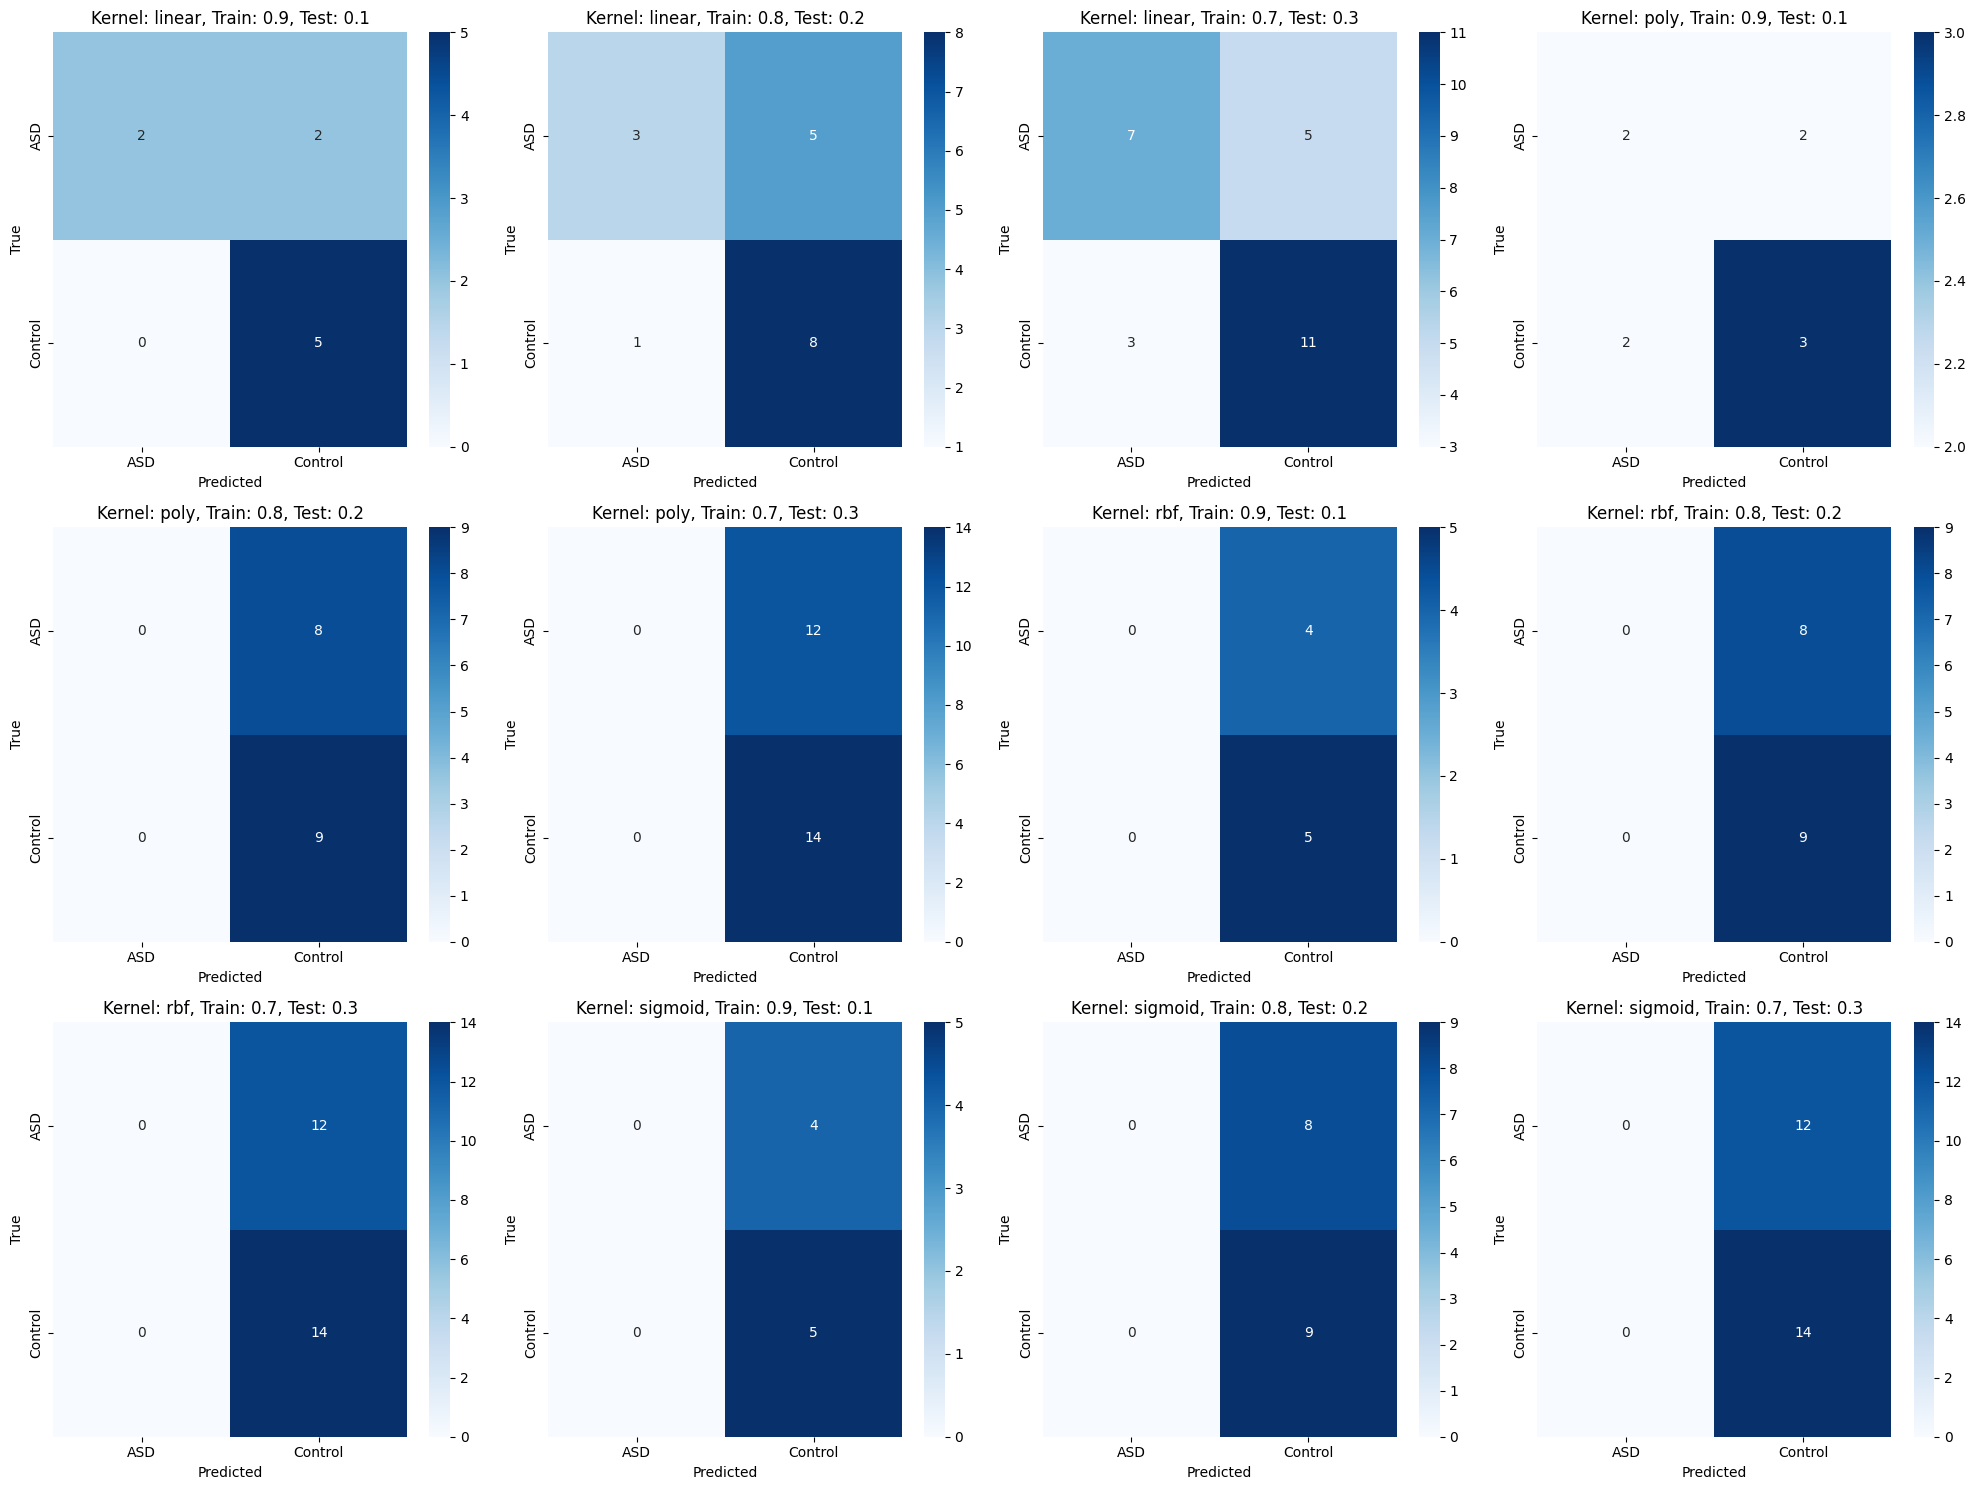

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(cm, title, labels, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Hitung jumlah plot (row * col) yang dibutuhkan
n_plots = len(results)
n_cols = 4  # jumlah kolom untuk plot
n_rows = (n_plots // n_cols) + (n_plots % n_cols > 0)  # hitung jumlah baris yang dibutuhkan

# Setup plot untuk confusion matrices
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Rata dengan array 1D

plot_index = 0

# Plot setiap confusion matrix
for result in results:
    cm = result['confusion_matrix']
    kernel = result['kernel']
    train_size = result['train_size']
    test_size = result['test_size']

    # Plot confusion matrix
    labels = ['ASD', 'Control']  # Sesuaikan label sesuai data Anda
    plot_confusion_matrix(cm, f"Kernel: {kernel}, Train: {train_size}, Test: {test_size}", labels, axes[plot_index])
    plot_index += 1

# Hapus sumbu kosong jika ada
for i in range(plot_index, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


###**SKENARIO PENGUJIAN REST**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Path ke file CSV hasil ekstraksi fitur GLCM yang telah digabungkan dengan label untuk 'rest'
rest_csv = '/content/drive/MyDrive/penpol/rest_with_label.csv'

# Baca dataset CSV ke dalam DataFrame untuk 'rest'
df_rest = pd.read_csv(rest_csv)

# Pisahkan fitur (X) dan label (y) untuk 'rest'
X_rest = df_rest.drop(columns=['id', 'label'])
y_rest = df_rest['label']

# Definisikan pembagian data yang akan diuji untuk 'rest'
splits_rest = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]

# Definisikan jenis kernel yang akan diuji untuk 'rest'
kernels_rest = ['linear', 'poly', 'rbf', 'sigmoid']

# Inisialisasi variabel untuk menyimpan akurasi tertinggi untuk 'rest'
best_accuracy_rest = 0.0
best_split_rest = None
best_kernel_rest = None

# Inisialisasi daftar untuk menyimpan hasil confusion matrix dan metrik untuk 'rest'
results_rest = []

# Lakukan pengujian untuk setiap kombinasi kernel dan pembagian data untuk 'rest'
for kernel_rest in kernels_rest:
    for train_size_rest, test_size_rest in splits_rest:
        # Split data untuk 'rest'
        X_train_rest, X_test_rest, y_train_rest, y_test_rest = train_test_split(
            X_rest, y_rest, train_size=train_size_rest, test_size=test_size_rest, random_state=42, stratify=y_rest
        )

        # Inisialisasi model SVM untuk 'rest'
        svm_model_rest = SVC(kernel=kernel_rest, random_state=42)

        # Latih model untuk 'rest'
        svm_model_rest.fit(X_train_rest, y_train_rest)

        # Prediksi menggunakan data uji untuk 'rest'
        y_pred_rest = svm_model_rest.predict(X_test_rest)

        # Hitung metrik evaluasi untuk 'rest' dengan zero_division=1 untuk menghindari UndefinedMetricWarning
        accuracy_rest = accuracy_score(y_test_rest, y_pred_rest)
        precision_rest = precision_score(y_test_rest, y_pred_rest, average='macro', zero_division=1)
        recall_rest = recall_score(y_test_rest, y_pred_rest, average='macro', zero_division=1)
        f1_rest = f1_score(y_test_rest, y_pred_rest, average='macro', zero_division=1)
        cm_rest = confusion_matrix(y_test_rest, y_pred_rest)

        # Simpan hasil untuk 'rest'
        results_rest.append({
            'kernel': kernel_rest,
            'train_size': train_size_rest,
            'test_size': test_size_rest,
            'accuracy': accuracy_rest,
            'precision': precision_rest,
            'recall': recall_rest,
            'f1': f1_rest,
            'confusion_matrix': cm_rest
        })

        # Cetak hasil untuk kombinasi kernel dan pembagian data ini untuk 'rest'
        print(f"Kernel: {kernel_rest}, Train Size: {train_size_rest}, Test Size: {test_size_rest}, Accuracy (rest): {accuracy_rest}")

        # Simpan akurasi tertinggi beserta kombinasi kernel dan pembagian data yang memberikan akurasi tertinggi untuk 'rest'
        if accuracy_rest > best_accuracy_rest:
            best_accuracy_rest = accuracy_rest
            best_split_rest = (train_size_rest, test_size_rest)
            best_kernel_rest = kernel_rest

print(f"\nBest Accuracy (rest): {best_accuracy_rest} menggunakan kernel: {best_kernel_rest} dan Train/Test Split: {best_split_rest}")

# Evaluasi model terbaik untuk 'rest'
X_train_best_rest, X_test_best_rest, y_train_best_rest, y_test_best_rest = train_test_split(
    X_rest, y_rest, train_size=best_split_rest[0], test_size=best_split_rest[1], random_state=42, stratify=y_rest
)

# Inisialisasi model SVM dengan kernel terbaik untuk 'rest'
svm_model_best_rest = SVC(kernel=best_kernel_rest, random_state=42)

# Latih model untuk 'rest'
svm_model_best_rest.fit(X_train_best_rest, y_train_best_rest)

# Prediksi menggunakan data uji untuk 'rest'
y_pred_best_rest = svm_model_best_rest.predict(X_test_best_rest)

# Hitung metrik evaluasi untuk 'rest'
accuracy_best_rest = accuracy_score(y_test_best_rest, y_pred_best_rest)
precision_best_rest = precision_score(y_test_best_rest, y_pred_best_rest, average='macro')
recall_best_rest = recall_score(y_test_best_rest, y_pred_best_rest, average='macro')
f1_best_rest = f1_score(y_test_best_rest, y_pred_best_rest, average='macro')

# Cetak metrik evaluasi untuk 'rest'
print(f"\nBest Model Evaluation (rest)")
print(f"Kernel: {best_kernel_rest}, Train Size: {best_split_rest[0]}, Test Size: {best_split_rest[1]}")
print(f"Accuracy: {accuracy_best_rest}")
print(f"Precision: {precision_best_rest}")
print(f"Recall: {recall_best_rest}")
print(f"F1-Score: {f1_best_rest}")

# Tampilkan laporan klasifikasi dengan target_names dikonversi ke string untuk 'rest'
target_names_rest = [str(name) for name in df_rest['label'].unique()]
classification_report_best_rest = classification_report(y_test_best_rest, y_pred_best_rest, target_names=target_names_rest)
print("\nClassification Report (rest):")
print(classification_report_best_rest)


Kernel: linear, Train Size: 0.9, Test Size: 0.1, Accuracy (rest): 0.5555555555555556
Kernel: linear, Train Size: 0.8, Test Size: 0.2, Accuracy (rest): 0.6470588235294118
Kernel: linear, Train Size: 0.7, Test Size: 0.3, Accuracy (rest): 0.6538461538461539
Kernel: poly, Train Size: 0.9, Test Size: 0.1, Accuracy (rest): 0.6666666666666666
Kernel: poly, Train Size: 0.8, Test Size: 0.2, Accuracy (rest): 0.5294117647058824
Kernel: poly, Train Size: 0.7, Test Size: 0.3, Accuracy (rest): 0.6538461538461539
Kernel: rbf, Train Size: 0.9, Test Size: 0.1, Accuracy (rest): 0.5555555555555556
Kernel: rbf, Train Size: 0.8, Test Size: 0.2, Accuracy (rest): 0.5294117647058824
Kernel: rbf, Train Size: 0.7, Test Size: 0.3, Accuracy (rest): 0.5384615384615384
Kernel: sigmoid, Train Size: 0.9, Test Size: 0.1, Accuracy (rest): 0.5555555555555556
Kernel: sigmoid, Train Size: 0.8, Test Size: 0.2, Accuracy (rest): 0.5294117647058824
Kernel: sigmoid, Train Size: 0.7, Test Size: 0.3, Accuracy (rest): 0.538461538

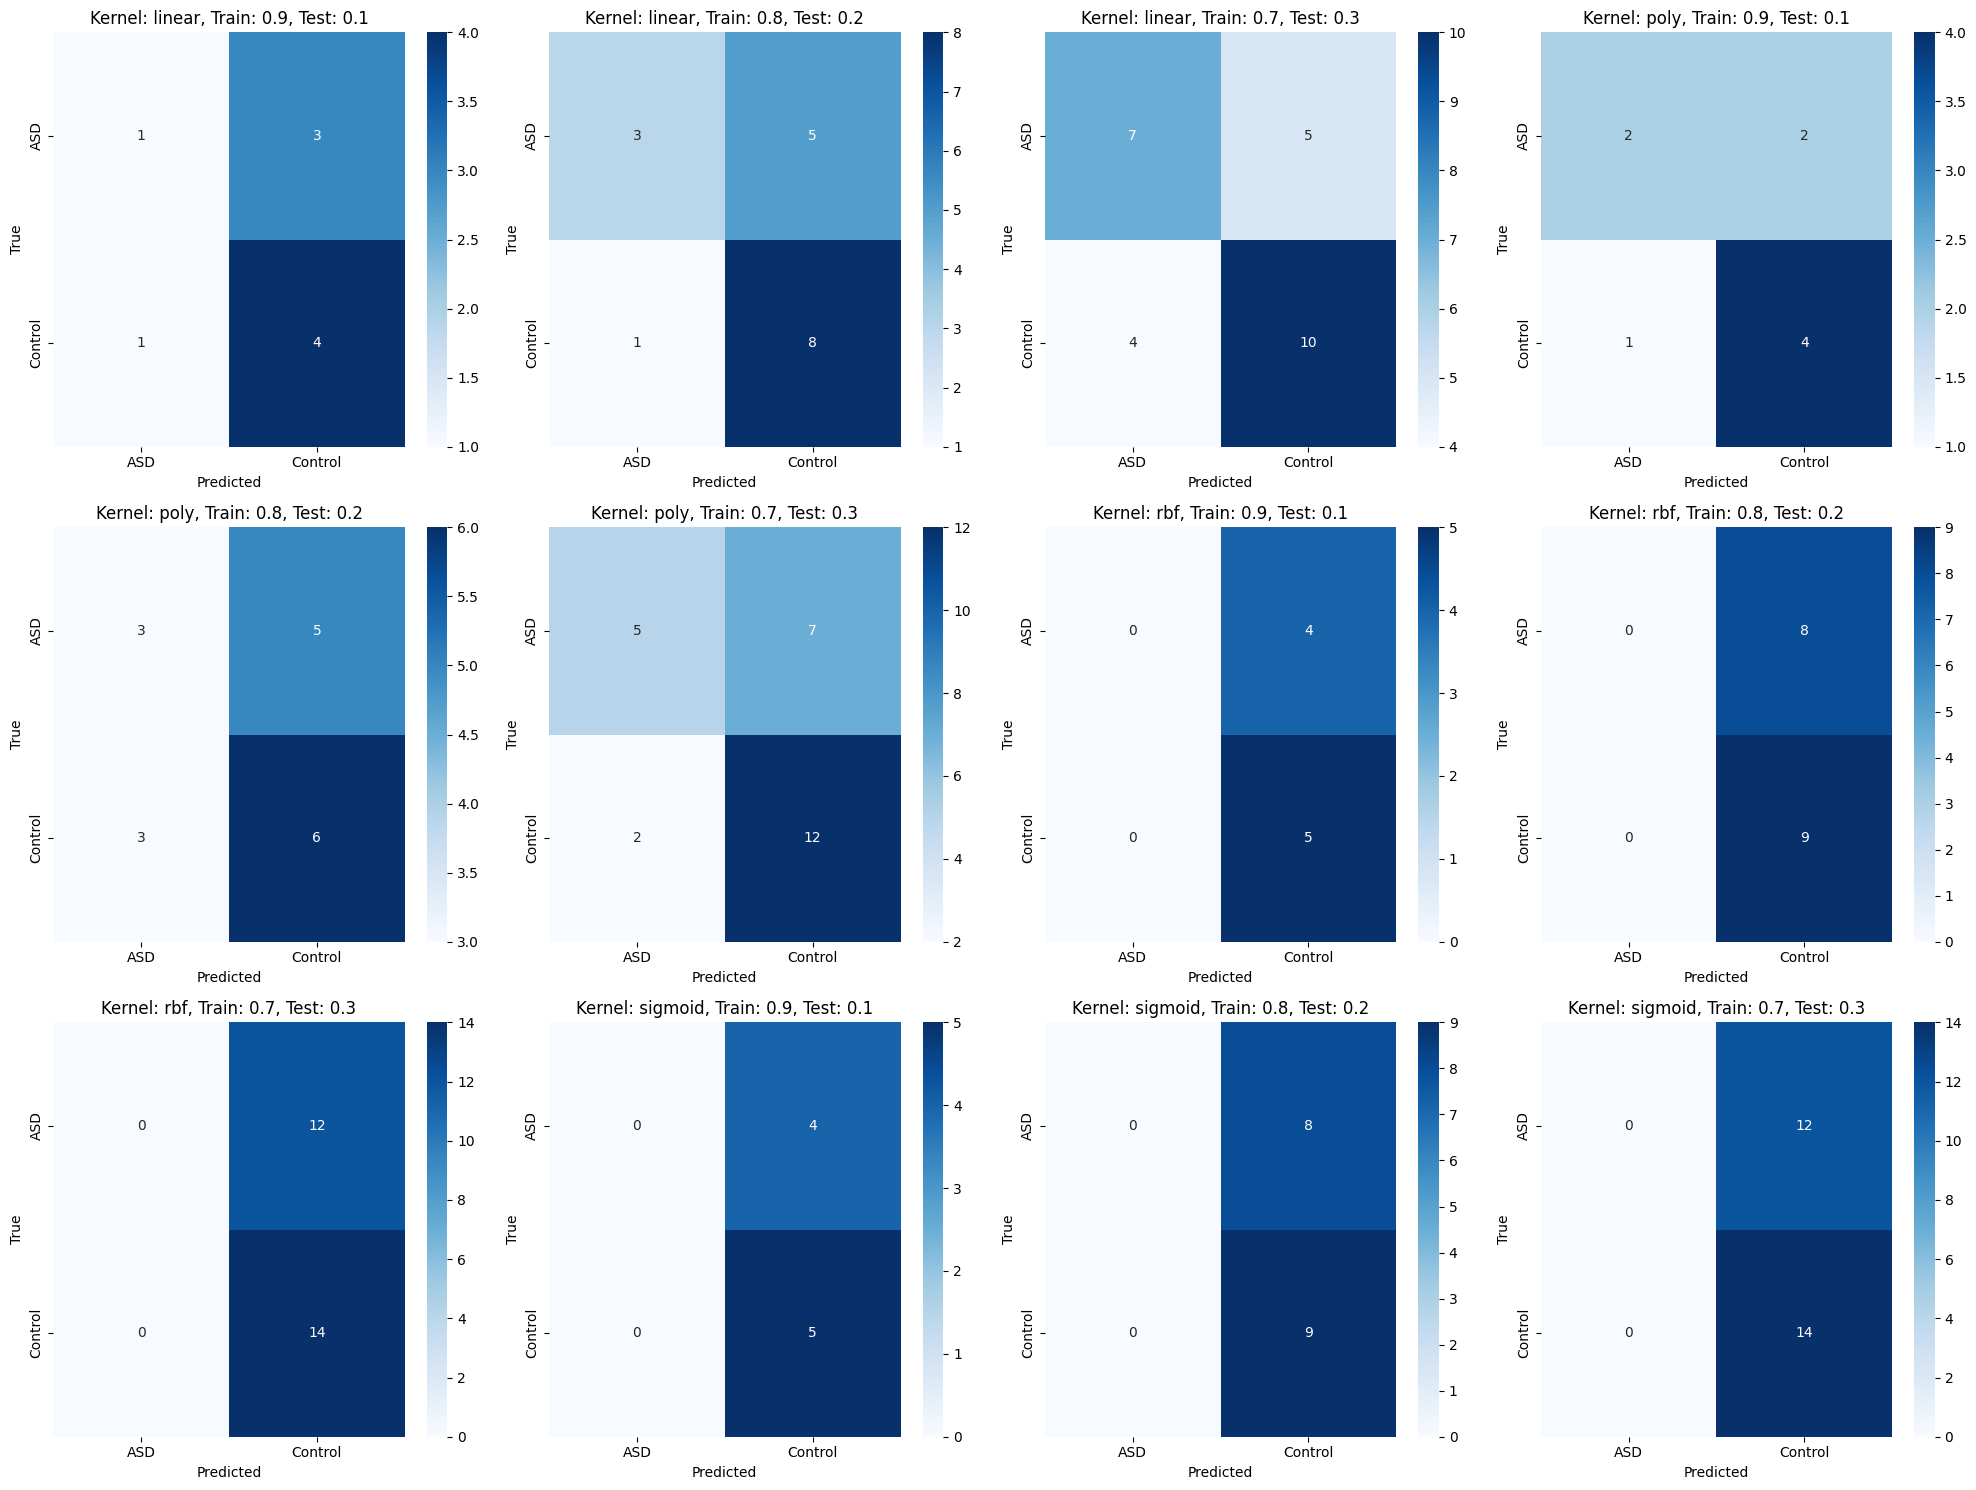

In [ ]:
# KODE REST 2
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk plot confusion matrix untuk 'rest'
def plot_confusion_matrix_rest(cm, title, labels, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Hitung jumlah plot (row * col) yang dibutuhkan untuk 'rest'
n_plots_rest = len(results_rest)
n_cols_rest = 4  # jumlah kolom untuk plot
n_rows_rest = (n_plots_rest // n_cols_rest) + (n_plots_rest % n_cols_rest > 0)  # hitung jumlah baris yang dibutuhkan

# Setup plot untuk confusion matrices untuk 'rest'
fig_rest, axes_rest = plt.subplots(n_rows_rest, n_cols_rest, figsize=(20, n_rows_rest * 5))
axes_rest = axes_rest.flatten()  # Rata dengan array 1D

plot_index_rest = 0

# Plot setiap confusion matrix untuk 'rest'
for result_rest in results_rest:
    cm_rest = result_rest['confusion_matrix']
    kernel_rest = result_rest['kernel']
    train_size_rest = result_rest['train_size']
    test_size_rest = result_rest['test_size']

    # Plot confusion matrix untuk 'rest'
    labels_rest = ['ASD', 'Control']  # Sesuaikan label sesuai data Anda
    plot_confusion_matrix_rest(cm_rest, f"Kernel: {kernel_rest}, Train: {train_size_rest}, Test: {test_size_rest}", labels_rest, axes_rest[plot_index_rest])
    plot_index_rest += 1

# Hapus sumbu kosong jika ada untuk 'rest'
for i in range(plot_index_rest, n_rows_rest * n_cols_rest):
    fig_rest.delaxes(axes_rest[i])

plt.tight_layout()
plt.show()


###**SKENARIO PENGUJIAN ANAT+REST**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Path to the CSV file containing GLCM features merged with labels
glcm_file = '/content/drive/MyDrive/penpol/glcm_with_label.csv'

# Read the CSV dataset into a DataFrame for GLCM
df_glcm = pd.read_csv(glcm_file)

# Separate features (X) and labels (y) for GLCM
X_glcm = df_glcm.drop(columns=['id'])  # Adjust based on your feature column structure
y_glcm = df_glcm['label']  # Adjust based on your label column name

# Get unique target class names for GLCM
target_names_glcm = df_glcm['label'].astype(str).unique()  # Convert to string and get unique values

# Define data splits for GLCM testing
splits_glcm = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]

# Define kernel types to test for GLCM
kernels_glcm = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize variables to store highest accuracy for GLCM
best_accuracy_glcm = 0.0
best_split_glcm = None
best_kernel_glcm = None

# Initialize list to store confusion matrix and metrics results for GLCM
results_glcm = []

# Perform testing for each kernel and data split combination for GLCM
for kernel_glcm in kernels_glcm:
    for train_size_glcm, test_size_glcm in splits_glcm:
        # Split data for GLCM
        X_train_glcm, X_test_glcm, y_train_glcm, y_test_glcm = train_test_split(
            X_glcm, y_glcm, train_size=train_size_glcm, test_size=test_size_glcm, random_state=42, stratify=y_glcm
        )

        # Initialize SVM model for GLCM
        svm_model_glcm = SVC(kernel=kernel_glcm, random_state=42)

        # Train model for GLCM
        svm_model_glcm.fit(X_train_glcm, y_train_glcm)

        # Predict using test data for GLCM
        y_pred_glcm = svm_model_glcm.predict(X_test_glcm)

        # Compute evaluation metrics for GLCM with zero_division=1 to avoid UndefinedMetricWarning
        accuracy_glcm = accuracy_score(y_test_glcm, y_pred_glcm)
        precision_glcm = precision_score(y_test_glcm, y_pred_glcm, average='macro', zero_division=1)
        recall_glcm = recall_score(y_test_glcm, y_pred_glcm, average='macro', zero_division=1)
        f1_glcm = f1_score(y_test_glcm, y_pred_glcm, average='macro', zero_division=1)
        cm_glcm = confusion_matrix(y_test_glcm, y_pred_glcm)

        # Save results for GLCM
        results_glcm.append({
            'kernel': kernel_glcm,
            'train_size': train_size_glcm,
            'test_size': test_size_glcm,
            'accuracy': accuracy_glcm,
            'precision': precision_glcm,
            'recall': recall_glcm,
            'f1': f1_glcm,
            'confusion_matrix': cm_glcm
        })

        # Print results for this kernel and data split combination for GLCM
        print(f"Kernel: {kernel_glcm}, Train Size: {train_size_glcm}, Test Size: {test_size_glcm}, Accuracy (GLCM): {accuracy_glcm}")

        # Save highest accuracy along with kernel and data split combination that gives the highest accuracy for GLCM
        if accuracy_glcm > best_accuracy_glcm:
            best_accuracy_glcm = accuracy_glcm
            best_split_glcm = (train_size_glcm, test_size_glcm)
            best_kernel_glcm = kernel_glcm

print(f"\nBest Accuracy (GLCM): {best_accuracy_glcm} using kernel: {best_kernel_glcm} and Train/Test Split: {best_split_glcm}")

# Evaluate best model for GLCM
X_train_best_glcm, X_test_best_glcm, y_train_best_glcm, y_test_best_glcm = train_test_split(
    X_glcm, y_glcm, train_size=best_split_glcm[0], test_size=best_split_glcm[1], random_state=42, stratify=y_glcm
)

# Initialize SVM model with the best kernel for GLCM
svm_model_best_glcm = SVC(kernel=best_kernel_glcm, random_state=42)

# Train model for GLCM
svm_model_best_glcm.fit(X_train_best_glcm, y_train_best_glcm)

# Predict using test data for GLCM
y_pred_best_glcm = svm_model_best_glcm.predict(X_test_best_glcm)

# Compute evaluation metrics for GLCM
accuracy_best_glcm = accuracy_score(y_test_best_glcm, y_pred_best_glcm)
precision_best_glcm = precision_score(y_test_best_glcm, y_pred_best_glcm, average='macro')
recall_best_glcm = recall_score(y_test_best_glcm, y_pred_best_glcm, average='macro')
f1_best_glcm = f1_score(y_test_best_glcm, y_pred_best_glcm, average='macro')

# Print evaluation metrics for GLCM
print(f"\nBest Model Evaluation (GLCM)")
print(f"Kernel: {best_kernel_glcm}, Train Size: {best_split_glcm[0]}, Test Size: {best_split_glcm[1]}")
print(f"Accuracy: {accuracy_best_glcm}")
print(f"Precision: {precision_best_glcm}")
print(f"Recall: {recall_best_glcm}")
print(f"F1-Score: {f1_best_glcm}")

# Display classification report for GLCM
classification_report_best_glcm = classification_report(y_test_best_glcm, y_pred_best_glcm, target_names=target_names_glcm)
print("\nClassification Report (GLCM):")
print(classification_report_best_glcm)


Kernel: linear, Train Size: 0.9, Test Size: 0.1, Accuracy (GLCM): 1.0
Kernel: linear, Train Size: 0.8, Test Size: 0.2, Accuracy (GLCM): 1.0
Kernel: linear, Train Size: 0.7, Test Size: 0.3, Accuracy (GLCM): 1.0
Kernel: poly, Train Size: 0.9, Test Size: 0.1, Accuracy (GLCM): 0.6666666666666666
Kernel: poly, Train Size: 0.8, Test Size: 0.2, Accuracy (GLCM): 0.6470588235294118
Kernel: poly, Train Size: 0.7, Test Size: 0.3, Accuracy (GLCM): 0.7692307692307693
Kernel: rbf, Train Size: 0.9, Test Size: 0.1, Accuracy (GLCM): 0.5555555555555556
Kernel: rbf, Train Size: 0.8, Test Size: 0.2, Accuracy (GLCM): 0.5294117647058824
Kernel: rbf, Train Size: 0.7, Test Size: 0.3, Accuracy (GLCM): 0.5384615384615384
Kernel: sigmoid, Train Size: 0.9, Test Size: 0.1, Accuracy (GLCM): 0.5555555555555556
Kernel: sigmoid, Train Size: 0.8, Test Size: 0.2, Accuracy (GLCM): 0.5294117647058824
Kernel: sigmoid, Train Size: 0.7, Test Size: 0.3, Accuracy (GLCM): 0.5384615384615384

Best Accuracy (GLCM): 1.0 using kern

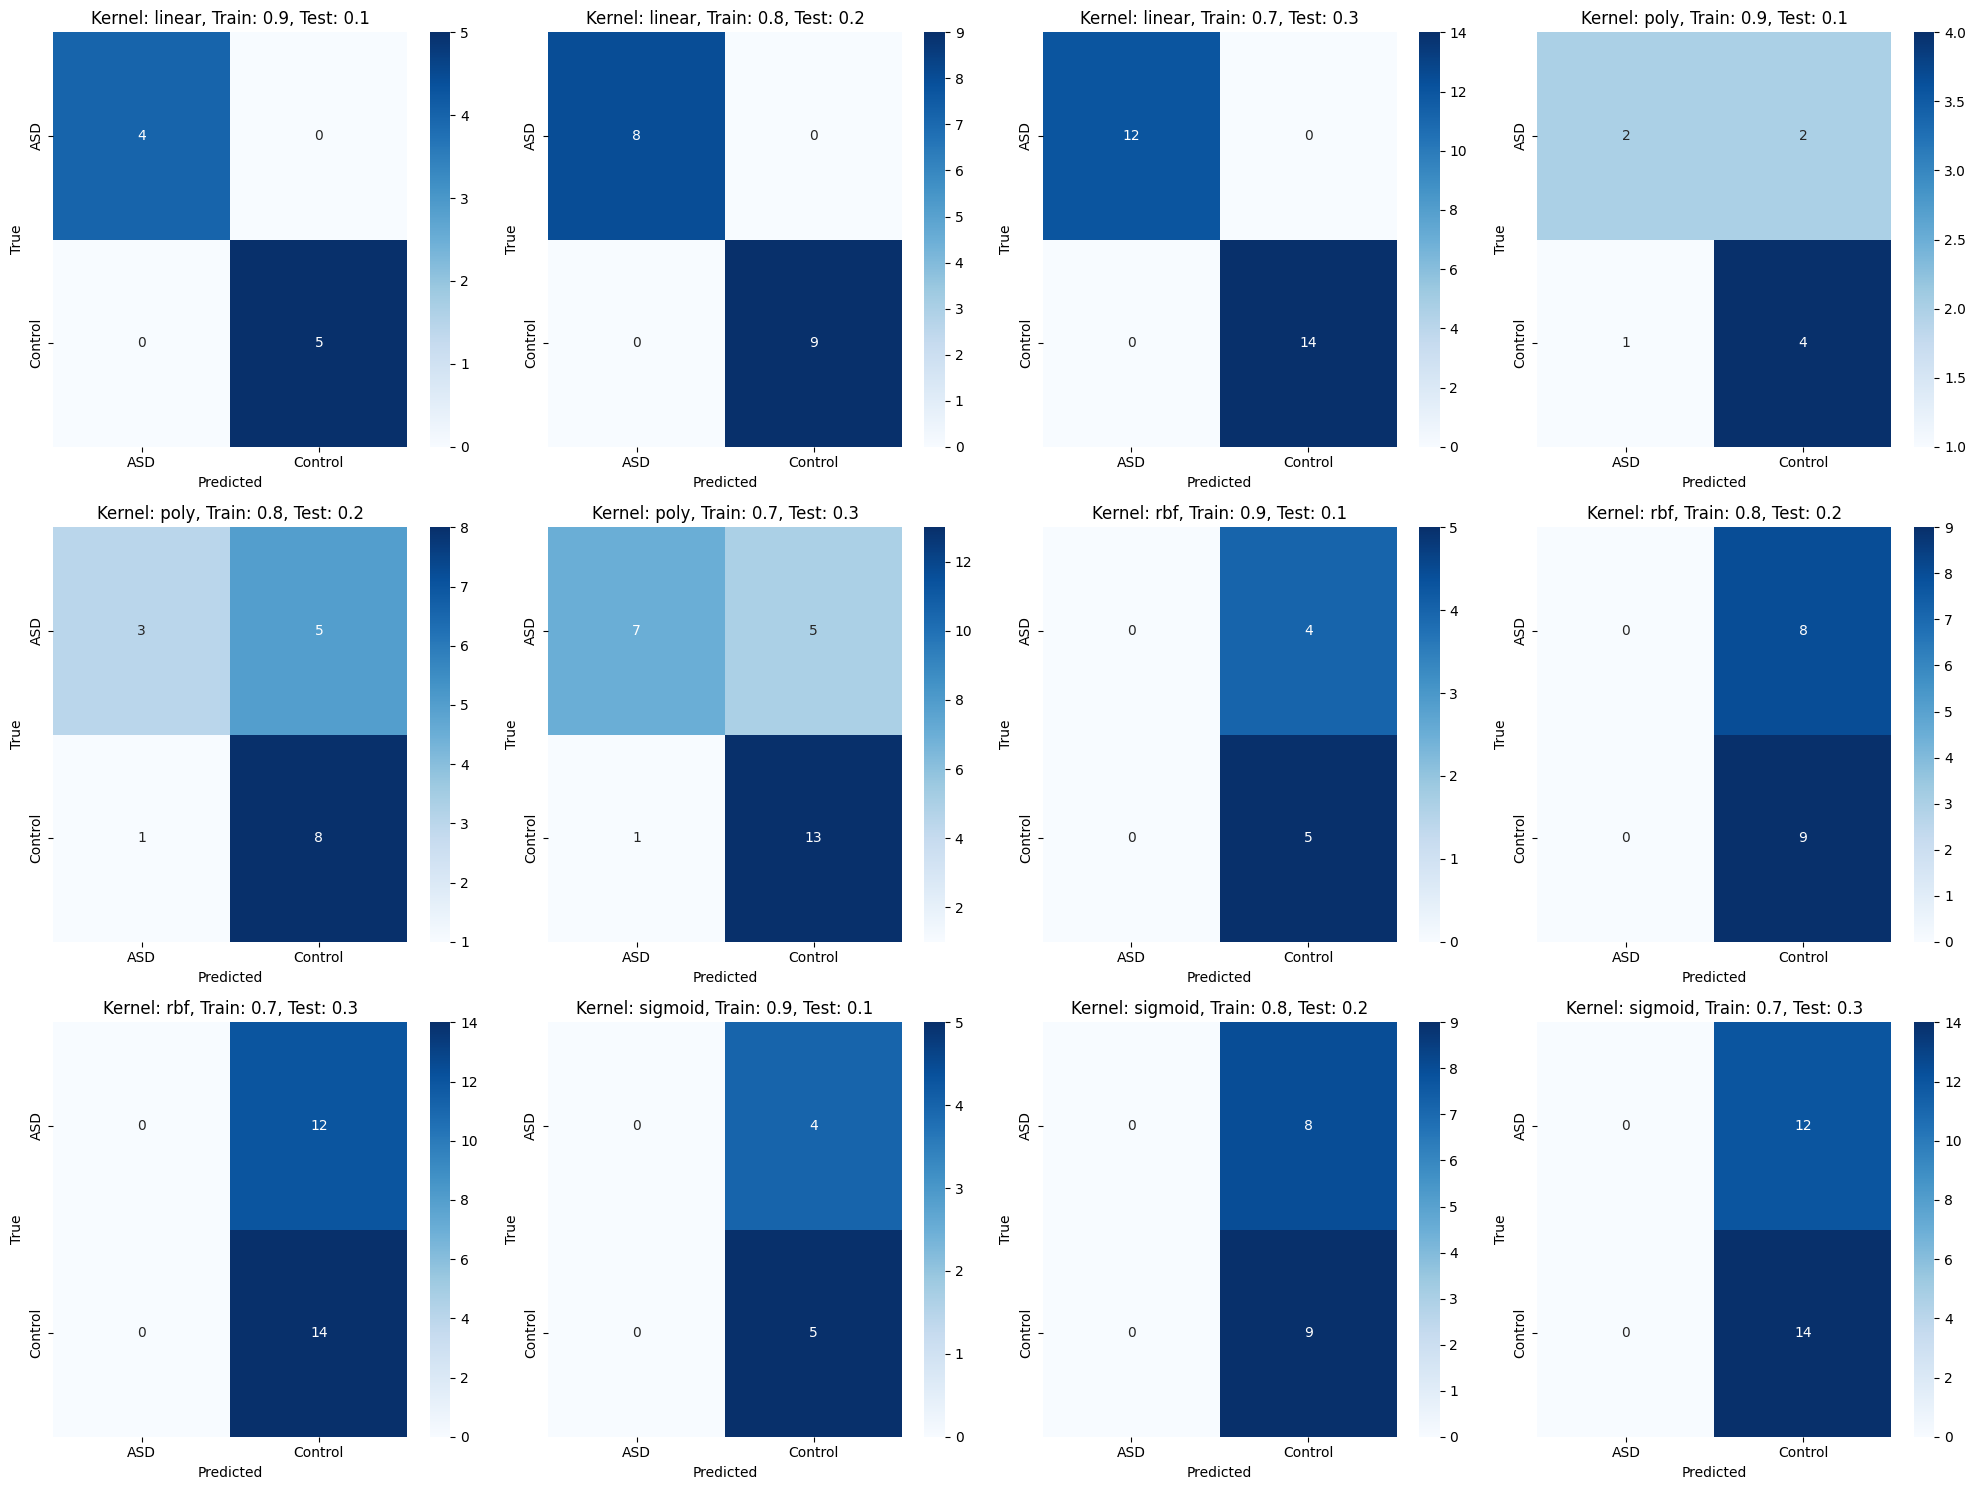

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk plot confusion matrix untuk GLCM
def plot_confusion_matrix_glcm(cm, title, labels, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Hitung jumlah plot (row * col) yang dibutuhkan untuk GLCM
n_plots_glcm = len(results_glcm)
n_cols_glcm = 4  # jumlah kolom untuk plot
n_rows_glcm = (n_plots_glcm // n_cols_glcm) + (n_plots_glcm % n_cols_glcm > 0)  # hitung jumlah baris yang dibutuhkan

# Setup plot untuk confusion matrices untuk GLCM
fig_glcm, axes_glcm = plt.subplots(n_rows_glcm, n_cols_glcm, figsize=(20, n_rows_glcm * 5))
axes_glcm = axes_glcm.flatten()  # Rata dengan array 1D

plot_index_glcm = 0

# Plot setiap confusion matrix untuk GLCM
for result_glcm in results_glcm:
    cm_glcm = result_glcm['confusion_matrix']
    kernel_glcm = result_glcm['kernel']
    train_size_glcm = result_glcm['train_size']
    test_size_glcm = result_glcm['test_size']

    # Plot confusion matrix untuk GLCM
    labels_glcm = ['ASD', 'Control']  # Sesuaikan label sesuai data Anda
    plot_confusion_matrix_glcm(cm_glcm, f"Kernel: {kernel_glcm}, Train: {train_size_glcm}, Test: {test_size_glcm}", labels_glcm, axes_glcm[plot_index_glcm])
    plot_index_glcm += 1

# Hapus sumbu kosong jika ada untuk GLCM
for i in range(plot_index_glcm, n_rows_glcm * n_cols_glcm):
    fig_glcm.delaxes(axes_glcm[i])

plt.tight_layout()
plt.show()
